In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import numpy.linalg as la # Linear algebra library
import math # Math library
import random # Random library

#TODO 
    #Values arent in same position each time after running KMeans
    #Graphs arent plotting properly in terms of grouping

In [2]:
student_data = pd.read_csv("student-por.csv", skipinitialspace = True, sep = ";")

In [3]:
student_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


# Description

#1
This data studies student achievement in secondary education of two Portuguese schoolsby including student grades, demographic, social and school related features
It was collected by using school reports and questionnaires. 
The two datasets are referring to the performance in the two subjects: Mathematics (mat) and Portuguese language (por).

#2
Some of the main classes in this dataset include but are not limited to:
- school
- family size
- Job
- sex
- age

Using the quantitative data columns that are on a scale of 1-5, we can determine the correlation these classes can tie those numbers together with. For example: What is the average freetime (1-5) of a family where both parents are teachers? health workers?

#3
Given we know a student's: absences, How often they go out, and their study time, we could use unsupervised algorithm to roughly determine a student's grade letter. This is different to their grade in number format as it provides different methods of calculating expected grade.

Given we know a student's {Mother job, Father job, Family Size} We can roughly estimate whether a family is "wealthy" or "Poor". Since we do not have an actual estimate of dollar count, a threshold can be set according to typical salaries of certain jobs.

Given we know a student's {Relationship status, Parental relationship status} we can estimate whether a student is likely to get married or not.

## 4. Implement your own version (not using pre-built libraries) of two supervised or unsupervised machine learning algorithms, you may choose ones not discussed in class.

In [4]:
#Create sub-dataset for school, address, famsize
student = student_data[['G1','G2','G3','school']]
#student
GP = student[student['school'] == 'GP'].reset_index()
MS = student[student['school'] == 'MS'].reset_index()

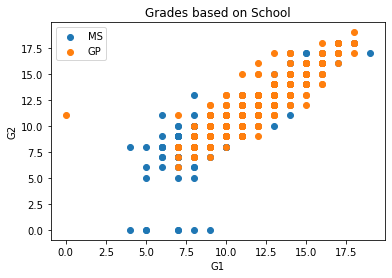

In [5]:
plt.scatter(MS['G1'],MS['G2'])
plt.scatter(GP['G1'],GP['G2'])
plt.title("Grades based on School")
plt.xlabel('G1')
plt.ylabel('G2')
plt.legend(['MS','GP'])
plt.show()

In [6]:
#Want to create a KMeans Clustering to choose which school a student goes to based on their address and famsize *Subject to change

class KMeans:
    """Given some data, determines k means to be used for classification"""
    def __init__(self, means):
        self.means = []
    
    def train(self, data, k, c, value1, value2):
        """Run the k-means algorithm, stores the final means in self.means"""
        # 1. choose k points at random from data
        copy_data = np.copy(data)
        np.random.shuffle(copy_data)
        self.means = copy_data[:k] # grab the first k rows after a random shuff
        print(self.means)
        # 2. loop the following until self.means stops changing
        #    - for each self.means as m, gather all rows of copy_data
        #         for which m is the closest mean, call this group_m
        count = 0
        while count < c: # want to add a convergence check
            #groups = np.array([np.zeros((0,4)), np.zeros((0,4)), np.zeros((0,4))]) # set of rows in copy_data for which self.means[i] is the closest mean
                       # aggregated group as a matrix, rows are rows of data
            groups = [[],[]]
            for i in range(len(self.means)):
                for row in copy_data:
                    #distances = []
                    minimum = np.inf
                    min_mean = 0
                    for j in range(len(self.means)):
                        # calculate distance to self.means[i]
                        #print(row[:2])
                        #print(self.means[j][1:3])
                        dist = la.norm(row[:2] - self.means[j][:2])
                        #print(dist)
                        if not np.isnan(dist) and dist < minimum:
                            minimum = dist
                            min_mean = j
                    # if min distance is at index i, then np.vstack([ group, row ])
                    #print(f'{i} {min_mean}')
                    if i == min_mean:
                        #print(f'stacking {row} onto {groups[i]}')
                        #print(f'stacked: {np.vstack([groups[i], row[:4]])}')
                        groups[i] += [row[:2].astype('float64')]
                        #groups[i] = np.vstack([groups[i],row[:4].astype('float64')])
                        #print(np.array(groups[i]))
                        #print(f'groups[{i}] = {groups[i]}')
                count += 1
                groups[i] = np.array(groups[i])
            #    - re-assign self.means[m] = mean(group_m)
            # self.means[i] = np.mean(group, axis=0)
            #print(self.means[i])
            self.means = [np.mean(group, axis=0) for group in groups]
        print(f'self.means: {self.means}')
        plt.scatter(data[value1], data[value2])
        plt.scatter(self.means[0][0], self.means[0][1], c = 'red')
        plt.scatter(self.means[1][0], self.means[1][1], c = 'blue')
        return groups[0], groups[1]
    
    def test(self, x, t1, t2):
        """Return the mean closest to x among self.means"""
        # find row of self.means that is the closest to x in euclidean distance
        distances = []
        dist1 = np.inf
        dist2 = np.inf
        #dist3 = np.inf
        print(t1[x][:2])
        print(t2[x][:2])
        #print(t3[x][:2])
        for i in range(len(self.means)):
            mean = la.norm( self.means[i][:2] - t1[x][:2] )
            if mean < dist1:
                dist1 = mean
        distances.append(dist1)
        
        for i in range(len(self.means)):
            mean = la.norm( self.means[i][:2] - t2[x][:2] )
            if mean < dist2:
                dist2 = mean
        distances.append(dist2)
        
        """for i in range(len(self.means)):
            mean = la.norm( self.means[i][:2] - t3[x][:2] )
            if mean < dist3:
                dist3 = mean
        distances.append(dist3)"""
        print(distances)
        
        # return it
        minimum = min(distances)
        for i in range(len(distances)):
            if minimum == distances[i]:
                return i

[[10 10 10 'GP']
 [15 14 17 'GP']]
self.means: [array([9.47107438, 9.62258953]), array([13.84615385, 14.04195804])]


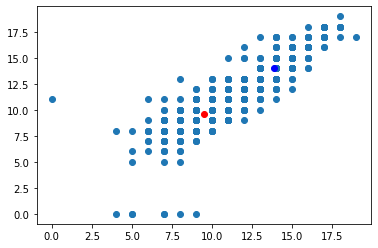

In [7]:
kmeans = KMeans(2)
gp, ms = kmeans.train(student, 2, 1000, 'G1', 'G2')

In [8]:
print("Size of GP student list ",len(GP))
print("Size of KMeans GP student list ",len(gp))

print("Size of MS list ",len(MS))
print("Size of KMeans MS list ",len(ms))

Size of GP student list  423
Size of KMeans GP student list  363
Size of MS list  226
Size of KMeans MS list  286


In [9]:
gplist = []
mslist = []
for i in range(len(gp)):
    gplist.append(gp[i][:2])
gplist = np.array(gplist)
#copy array for later use in test
cpgplist = np.array(gplist)

for i in range(len(ms)):
    mslist.append(ms[i][:2])
mslist = np.array(mslist)
cpmslist = np.array(mslist)

## Original Student Dispersion based on GP 1-2

Text(0.5, 1.0, 'MS Student Pre-Finals Grades')

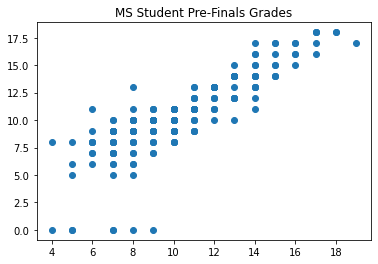

In [10]:
#original
plt.scatter(MS['G1'],MS['G2'])
plt.title("MS Student Pre-Finals Grades")

Text(0.5, 1.0, 'GP Student Pre-Finals Grades')

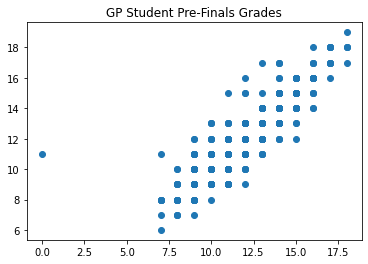

In [11]:
plt.scatter(GP['G1'],GP['G2'])
plt.title("GP Student Pre-Finals Grades")

## KMeans Predicted Dispersion based on GP 1-2

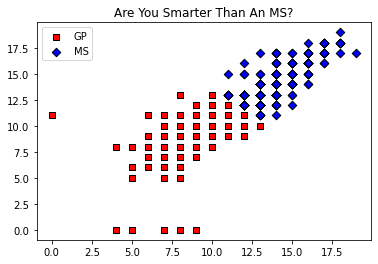

In [12]:
#Kmeans predicted
gplist = pd.DataFrame(gplist)
mslist = pd.DataFrame(mslist)
plt.scatter(gplist[0],gplist[1], c = 'red', marker = "s", edgecolor = 'black')
plt.scatter(mslist[0],mslist[1], c = 'blue', marker = "D", edgecolor = 'black')
plt.title("Are You Smarter Than An MS?")
plt.legend(['GP','MS'])

While the above does not accurately depict how the schools should be split, it does help drastically represent the major GP difference between GP and MS. GP has an average of around 14.4 while MS sits with a minor 9.8. The above graph represents the cut off that differentiates the two schools and depicts an absurd yet relavent Grade difference. This graph, helps show that if a new student enrolls in school, if their Grades are above the distinct line above, the student should likely do well/belongs to GP. Thus, it may be possible with more detailed data to make the claim: Students that attend GP tend to be smarter than students that attend MS on average.

In [13]:
x = 10
school_choice = kmeans.test(x,cpgplist,cpmslist)
if(school_choice == 0):
    print("Mean with closest distance to  chosen index value: GP mean")
if(school_choice == 1):
    print("Mean with closest distance to chosen index value: MS mean")

[8. 8.]
[12. 13.]
[2.1901727375478046, 2.1198963618228315]
Mean with closest distance to chosen index value: MS mean


## Taking a look at absences based on How much a student goes out and their attendance

In [14]:
attendance = student_data[['goout','health','absences']]
attendance

,goout,health,absences
0,4,3,4
1,3,3,2
2,2,3,6
3,2,5,0
4,2,5,0
...,...,...,...
644,2,5,4
645,4,1,4
646,1,5,6
647,5,2,6


In [15]:
Great = attendance[(attendance['absences'] >= 0) & (attendance['absences'] <= 3)].reset_index()
Poor = attendance[(attendance['absences'] >= 4)].reset_index()
Poor

,index,goout,health,absences
0,0,4,3,4
1,2,2,3,6
2,5,2,5,6
3,15,4,2,6
4,16,3,2,10
...,...,...,...,...
271,644,2,5,4
272,645,4,1,4
273,646,1,5,6
274,647,5,2,6


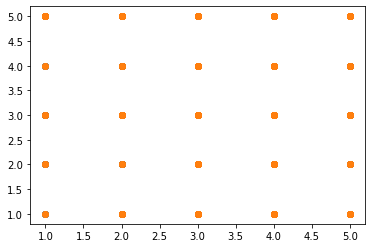

In [16]:
plt.scatter(Great['goout'],Great['health'])
plt.scatter(Poor['goout'],Poor['health'])

[[3 2 4]
 [1 3 0]]
self.means: [array([3.15410959, 2.11643836]), array([3.21008403, 4.69747899])]


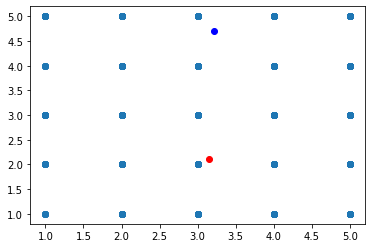

In [17]:
kmeans = KMeans(2)
great, poor = kmeans.train(attendance,2, 100, 'goout', 'health')

In [18]:
print("Size of Great attendance list ",len(Great))
print("Size of KMeans Great attendance list ",len(great))

print("Size of Poor attendance list ",len(Poor))
print("Size of KMeans Poor attendance list ",len(poor))

Size of Great attendance list  373
Size of KMeans Great attendance list  292
Size of Poor attendance list  276
Size of KMeans Poor attendance list  357


In [19]:
great_list = []
poor_list = []
for i in range(len(great)):
    great_list.append(great[i][:2])
great_list = np.array(great_list)
#copy array for later use in test
cpgreat_list = np.array(great_list)

for i in range(len(poor)):
    poor_list.append(poor[i][:2])
poor_list = np.array(poor_list)
cppoor_list = np.array(poor_list)

Text(0, 0.5, 'Level of Health')

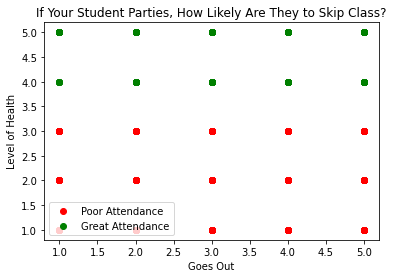

In [20]:
#Kmeans predicted
great_list = pd.DataFrame(great_list)
poor_list = pd.DataFrame(poor_list)
plt.scatter(great_list[0],great_list[1], c = 'red')
plt.scatter(poor_list[0],poor_list[1], c = 'green')
plt.title('If Your Student Parties, How Likely Are They to Skip Class?')
plt.legend(['Poor Attendance','Great Attendance'])
plt.xlabel('Goes Out')
plt.ylabel('Level of Health')

In [21]:
famSize = student_data[['G1', 'G2', 'G3','age']]
famSize

,G1,G2,G3,age
0,0,11,11,18
1,9,11,11,17
2,12,13,12,15
3,14,14,14,15
4,11,13,13,16
...,...,...,...,...
644,10,11,10,19
645,15,15,16,18
646,11,12,9,18
647,10,10,10,17


In [22]:
Fifteen = famSize[famSize['age'] == 15].reset_index()
Sixteen = famSize[famSize['age'] == 16].reset_index()
Seventeen = famSize[famSize['age'] == 17].reset_index()
Eighteen = famSize[famSize['age'] == 18].reset_index()
Nineteen = famSize[famSize['age'] == 19].reset_index()
Twenty = famSize[famSize['age'] == 20].reset_index()
Twenty_one = famSize[famSize['age'] == 21].reset_index()
Twenty_two = famSize[famSize['age'] == 22].reset_index()

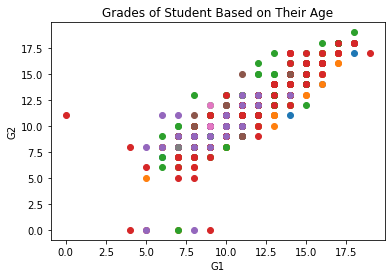

In [23]:
plt.scatter(Fifteen['G1'],Fifteen['G2'])
plt.scatter(Sixteen['G1'],Sixteen['G2'])
plt.scatter(Seventeen['G1'],Seventeen['G2'])
plt.scatter(Eighteen['G1'],Eighteen['G2'])
plt.scatter(Nineteen['G1'],Nineteen['G2'])
plt.scatter(Twenty['G1'],Twenty['G2'])
plt.scatter(Twenty_one['G1'],Twenty_one['G2'])
plt.scatter(Twenty_two['G1'],Twenty_two['G2'])
plt.xlabel("G1")
plt.ylabel("G2")
plt.title("Grades of Student Based on Their Age")
plt.show()

In [24]:
#Want to create a KMeans Clustering to choose which school a student goes to based on their address and famsize *Subject to change

class KMeans:
    """Given some data, determines k means to be used for classification"""
    def __init__(self, means):
        self.means = []
    
    def train(self, data, k, c, value1, value2):
        """Run the k-means algorithm, stores the final means in self.means"""
        # 1. choose k points at random from data
        copy_data = np.copy(data)
        np.random.shuffle(copy_data)
        self.means = copy_data[:k] # grab the first k rows after a random shuff
        print(self.means)
        # 2. loop the following until self.means stops changing
        #    - for each self.means as m, gather all rows of copy_data
        #         for which m is the closest mean, call this group_m
        count = 0
        while count < c: # want to add a convergence check
            #groups = np.array([np.zeros((0,4)), np.zeros((0,4)), np.zeros((0,4))]) # set of rows in copy_data for which self.means[i] is the closest mean
                       # aggregated group as a matrix, rows are rows of data
            groups = [[],[],[],[],[],[],[],[]]
            for i in range(len(self.means)):
                for row in copy_data:
                    #distances = []
                    minimum = np.inf
                    min_mean = 0
                    for j in range(len(self.means)):
                        # calculate distance to self.means[i]
                        print(row[:3])
                        #print(self.means[j][:3])
                        dist = la.norm(row[:3] - self.means[j][:3])
                        #print(dist)
                        if not np.isnan(dist) and dist < minimum:
                            minimum = dist
                            min_mean = j
                    # if min distance is at index i, then np.vstack([ group, row ])
                    #print(f'{i} {min_mean}')
                    if i == min_mean:
                        #print(f'stacking {row} onto {groups[i]}')
                        #print(f'stacked: {np.vstack([groups[i], row[:4]])}')
                        groups[i] += [row[:3].astype('float64')]
                        #groups[i] = np.vstack([groups[i],row[:4].astype('float64')])
                        #print(np.array(groups[i]))
                        #print(f'groups[{i}] = {groups[i]}')
                count += 1
                groups[i] = np.array(groups[i])
            #    - re-assign self.means[m] = mean(group_m)
            # self.means[i] = np.mean(group, axis=0)
            #print(self.means[i])
            self.means = [np.mean(group, axis=0) for group in groups]
        print(f'self.means: {self.means}')
        plt.scatter(data[value1], data[value2],)
        plt.scatter(self.means[0][0], self.means[0][1], c = 'red')
        plt.scatter(self.means[1][0], self.means[1][1], c = 'orange')
        plt.scatter(self.means[2][0], self.means[2][1], c = 'yellow')
        plt.scatter(self.means[3][0], self.means[3][1], c = 'green')
        plt.scatter(self.means[4][0], self.means[4][1], c = 'blue')
        plt.scatter(self.means[5][0], self.means[5][1], c = 'indigo')
        plt.scatter(self.means[6][0], self.means[6][1], c = 'violet')
        plt.scatter(self.means[7][0], self.means[7][1])
        return groups[0], groups[1], groups[2], groups[3], groups[4], groups[5], groups[6], groups[7]
    
    def test(self, x, t1, t2):
        """Return the mean closest to x among self.means"""
        # find row of self.means that is the closest to x in euclidean distance
        distances = []
        dist1 = np.inf
        dist2 = np.inf
        #dist3 = np.inf
        print(t1[x][:2])
        print(t2[x][:2])
        #print(t3[x][:2])
        for i in range(len(self.means)):
            mean = la.norm( self.means[i][:2] - t1[x][:2] )
            if mean < dist1:
                dist1 = mean
        distances.append(dist1)
        
        for i in range(len(self.means)):
            mean = la.norm( self.means[i][:2] - t2[x][:2] )
            if mean < dist2:
                dist2 = mean
        distances.append(dist2)
        
        """for i in range(len(self.means)):
            mean = la.norm( self.means[i][:2] - t3[x][:2] )
            if mean < dist3:
                dist3 = mean
        distances.append(dist3)"""
        print(distances)
        
        # return it
        minimum = min(distances)
        for i in range(len(distances)):
            if minimum == distances[i]:
                return i

[[13 15 15 17]
 [ 8  8  8 16]
 [15 15 15 17]
 [13 12 12 15]
 [ 9 10 10 16]
 [10 11 11 19]
 [12 11 11 17]
 [12 13 14 18]]
[13 15 15]
[13 15 15]
[13 15 15]
[13 15 15]
[13 15 15]
[13 15 15]
[13 15 15]
[13 15 15]
[8 8 8]
[8 8 8]
[8 8 8]
[8 8 8]
[8 8 8]
[8 8 8]
[8 8 8]
[8 8 8]
[15 15 15]
[15 15 15]
[15 15 15]
[15 15 15]
[15 15 15]
[15 15 15]
[15 15 15]
[15 15 15]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 13 14]
[12 13 14]
[12 13 14]
[12 13 14]
[12 13 14]
[12 13 14]
[12 13 14]
[12 13 14]
[15 15 14]
[15 15 14]
[15 15 14]
[15 15 14]
[15 15 14]
[15 15 14]
[15 15 14]
[15 15 14]
[8 9 9]
[8 9 9]
[8 9 9]
[8 9 9]
[8 9 9]
[8 9 9]
[8 9 9]
[8 9 9]
[13 14 16]
[13 14 16]
[13 14 16]
[13 14 16]
[13

[11 12 13]
[11 12 13]
[11 12 13]
[11 12 13]
[11 12 13]
[11 12 13]
[10 11 10]
[10 11 10]
[10 11 10]
[10 11 10]
[10 11 10]
[10 11 10]
[10 11 10]
[10 11 10]
[8 5 8]
[8 5 8]
[8 5 8]
[8 5 8]
[8 5 8]
[8 5 8]
[8 5 8]
[8 5 8]
[11 15 15]
[11 15 15]
[11 15 15]
[11 15 15]
[11 15 15]
[11 15 15]
[11 15 15]
[11 15 15]
[12 13 14]
[12 13 14]
[12 13 14]
[12 13 14]
[12 13 14]
[12 13 14]
[12 13 14]
[12 13 14]
[14 15 16]
[14 15 16]
[14 15 16]
[14 15 16]
[14 15 16]
[14 15 16]
[14 15 16]
[14 15 16]
[12 13 14]
[12 13 14]
[12 13 14]
[12 13 14]
[12 13 14]
[12 13 14]
[12 13 14]
[12 13 14]
[8 6 8]
[8 6 8]
[8 6 8]
[8 6 8]
[8 6 8]
[8 6 8]
[8 6 8]
[8 6 8]
[ 7  9 10]
[ 7  9 10]
[ 7  9 10]
[ 7  9 10]
[ 7  9 10]
[ 7  9 10]
[ 7  9 10]
[ 7  9 10]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 15 15]
[16 15 15]
[16 15 15]
[16 15 15]
[16 15 15]
[16 15 15]
[16 15 15]
[16 15 15]
[11 13 14]
[11

[13 14 14]
[13 14 14]
[13 14 14]
[12 13 13]
[12 13 13]
[12 13 13]
[12 13 13]
[12 13 13]
[12 13 13]
[12 13 13]
[12 13 13]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[11 10 10]
[11 10 10]
[11 10 10]
[11 10 10]
[11 10 10]
[11 10 10]
[11 10 10]
[11 10 10]
[17 18 17]
[17 18 17]
[17 18 17]
[17 18 17]
[17 18 17]
[17 18 17]
[17 18 17]
[17 18 17]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[15 15 17]
[15 15 17]
[15 15 17]
[15 15 17]
[15 15 17]
[15 15 17]
[15 15 17]
[15 15 17]

[14 15 16]
[14 15 16]
[14 15 16]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[12 11 12]
[12 11 12]
[12 11 12]
[12 11 12]
[12 11 12]
[12 11 12]
[12 11 12]
[12 11 12]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[10  9  9]
[10  9  9]
[10  9  9]
[10  9  9]
[10  9  9]
[10  9  9]
[10  9  9]
[10  9  9]
[10  9 11]
[10  9 11]
[10  9 11]
[10  9 11]
[10  9 11]
[10  9 11]
[10  9 11]
[10  9 11]
[14 15 16]
[14 15 16]
[14 15 16]
[14 15 16]
[14 15 16]
[14 15 16]
[14 15 16]
[14 15 16]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[17 17 18]
[17 17 18]
[17 17 18]
[17 17 18]
[17 17 18]
[17 17 18]
[17 17 18]
[17 17 18]
[8 7 8]
[8 7 8]
[8 7 8]
[8 7 8]
[8 7 8]
[8 7 8]
[8 7 8]
[8 7 8]
[13 13 14]
[13 13 14]
[

[14 17 17]
[14 17 17]
[14 17 17]
[14 17 17]
[14 13 12]
[14 13 12]
[14 13 12]
[14 13 12]
[14 13 12]
[14 13 12]
[14 13 12]
[14 13 12]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[8 9 8]
[8 9 8]
[8 9 8]
[8 9 8]
[8 9 8]
[8 9 8]
[8 9 8]
[8 9 8]
[18 18 18]
[18 18 18]
[18 18 18]
[18 18 18]
[18 18 18]
[18 18 18]
[18 18 18]
[18 18 18]
[13 14 15]
[13 14 15]
[13 14 15]
[13 14 15]
[13 14 15]
[13 14 15]
[13 14 15]
[13 14 15]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[ 8 10 11]
[ 8 10 11]
[ 8 10 11]
[ 8 10 11]
[ 8 10 11]
[ 8 10 11]
[ 8 10 11]
[ 8 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 11 10]
[11 11 10]
[11 11 10]
[11 11 10]
[11 11 10]
[11 11 10]
[11 11 10]
[11 11 10]
[14 14 15]
[

[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[16 16 17]
[16 16 17]
[16 16 17]
[16 16 17]
[16 16 17]
[16 16 17]
[16 16 17]
[16 16 17]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[13 15 16]
[13 15 16]
[13 15 16]
[13 15 16]
[13 15 16]
[13 15 16]
[13 15 16]
[13 15 16]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[11 12 12]
[11 12 12]
[11 12 12]
[11 12 12]
[11 12 12]
[11 12 12]
[11 12 12]
[11 12 12]
[12 11 12]
[12 11 12]
[12 11 12]
[12 11 12]
[12 11 12]
[12 11 12]
[12 11 12]
[12 11 12]
[15 15 16]
[15 15 16]
[15 15 16]
[15 15 16]
[15 15 16]
[15 15 16]
[15 15 16]
[15 15 16]
[14 15 17]
[14 15 17]
[14 15 17]
[14 15 17]
[14 15 17]
[14 15 17]
[14 15 17]
[14 15 17]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]

[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[11 12 13]
[11 12 13]
[11 12 13]
[11 12 13]
[11 12 13]
[11 12 13]
[11 12 13]
[11 12 13]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[7 7 8]
[7 7 8]
[7 7 8]
[7 7 8]
[7 7 8]
[7 7 8]
[7 7 8]
[7 7 8]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 16]
[14 14 16]
[14 14 16]
[14 14 16]
[14 14 16]
[14 14 16]
[14 14 16]
[14 14 16]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[ 7 11 11]
[ 7 11 11]
[ 7 11 11]
[ 7 11 11]
[ 7 11 11]
[ 7 11 11]
[ 7 11 11]
[ 7 11 11]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[11 11 13]
[11 11 13]
[11 11 13]
[11 11 13]
[11 11 13]
[11 11 13]
[11 11 13]
[11 11 13]
[

[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 11 13]
[11 11 13]
[11 11 13]
[11 11 13]
[11 11 13]
[11 11 13]
[11 11 13]
[11 11 13]
[11 12 13]
[11 12 13]
[11 12 13]
[11 12 13]
[11 12 13]
[11 12 13]
[11 12 13]
[11 12 13]
[13 12 13]
[13 12 13]
[13 12 13]
[13 12 13]
[13 12 13]
[13 12 13]
[13 12 13]
[13 12 13]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[14 14 14]
[14 14 14]
[14 14 14]
[14 14 14]
[14 14 14]
[14 14 14]
[14 14 14]
[14 14 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[12 10 11]
[12 10 11]
[12 10 11]
[12 10 11]
[12 10 11]
[12 10 11]

[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[8 9 9]
[8 9 9]
[8 9 9]
[8 9 9]
[8 9 9]
[8 9 9]
[8 9 9]
[8 9 9]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[12  9 10]
[12  9 10]
[12  9 10]
[12  9 10]
[12  9 10]
[12  9 10]
[12  9 10]
[12  9 10]
[ 9 10  9]
[ 9 10  9]
[ 9 10  9]
[ 9 10  9]
[ 9 10  9]
[ 9 10  9]
[ 9 10  9]
[ 9 10  9]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[5 6 6]
[5 6 6]
[5 6 6]
[5 6 6]
[5 6 6]
[5 6 6]
[5 6 6]
[5 6 6]
[13 12 12]
[13

[14 13 13]
[14 13 13]
[14 13 13]
[14 13 13]
[14 13 13]
[14 13 13]
[11  9 10]
[11  9 10]
[11  9 10]
[11  9 10]
[11  9 10]
[11  9 10]
[11  9 10]
[11  9 10]
[14 15 17]
[14 15 17]
[14 15 17]
[14 15 17]
[14 15 17]
[14 15 17]
[14 15 17]
[14 15 17]
[10 10 16]
[10 10 16]
[10 10 16]
[10 10 16]
[10 10 16]
[10 10 16]
[10 10 16]
[10 10 16]
[10 12 14]
[10 12 14]
[10 12 14]
[10 12 14]
[10 12 14]
[10 12 14]
[10 12 14]
[10 12 14]
[6 8 9]
[6 8 9]
[6 8 9]
[6 8 9]
[6 8 9]
[6 8 9]
[6 8 9]
[6 8 9]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 10 13]
[13 10 13]
[13 10 13]
[13 10 13]
[13 10 13]
[13 10 13]
[13 10 13]
[13 10 13]
[8 7 7]
[8 7 7]
[8 7 7]
[8 7 7]
[8 7 7]
[8 7 7]
[8 7 7]
[8 7 7]
[ 9 12 13]
[ 9 12 13]
[ 9 12 13]
[ 9 12 13]
[ 9 12 13]
[ 9 12 13]
[ 9 12 13]
[ 9 12 13]
[ 7  9 10]
[ 7  9 10]
[ 7  9 10]
[ 7  9 10]
[ 7  9 10]
[ 7  9 10]
[ 7  9 10]
[ 7  9 10]
[7 5 0]
[7 5 0]
[7 5 0]
[7 5 0]
[7 5 0]
[7 5 0]
[7 5 0]
[7 5 0]
[ 8 11 10]
[ 8 11 10]
[ 8 11 10]
[ 8 1

[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[7 9 9]
[7 9 9]
[7 9 9]
[7 9 9]
[7 9 9]
[7 9 9]
[7 9 9]
[7 9 9]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[15 14 17]
[15 14 17]
[15 14 17]
[15 14 17]
[15 14 17]
[15 14 17]
[15 14 17]
[15 14 17]
[ 8 10  9]
[ 8 10  9]
[ 8 10  9]
[ 8 10  9]
[ 8 10  9]
[ 8 10  9]
[ 8 10  9]
[ 8 10  9]
[11 12 12]
[11 12 12]
[11 12 12]
[11 12 12]
[11 12 12]
[11 12 12]
[11 12 12]
[11 12 12]
[17 18 19]
[17 18 19]
[17 18 19]
[17 18 19]
[17 18 19]
[17 18 19]
[17 18 19]
[17 18 19]
[14 13 13]
[14 13 13]
[14 13 13]
[14 13 13]
[14 13 13]
[14 13 13]
[14 13 13]
[14 13 13]
[12 13 13]
[12 13 13]
[12 13 13]
[12 13 13]
[12 13 13]
[12 13 13]
[

[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 10 11]
[12 10 11]
[12 10 11]
[12 10 11]
[12 10 11]
[12 10 11]
[12 10 11]
[12 10 11]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[6 7 8]
[6 7 8]
[6 7 8]
[6 7 8]
[6 7 8]
[6 7 8]
[6 7 8]
[6 7 8]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 11 12]
[11 11 12]
[11 11 12]
[11 11 12]
[11 11 12]
[11 11 12]
[11 11 12]
[11 11 12]
[15 12 13]
[15 12 13]
[15 12 13]
[15 12 13]
[15 12 13]
[15 12 13]
[

[12 12 12]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[ 8  9 10]
[ 8  9 10]
[ 8  9 10]
[ 8  9 10]
[ 8  9 10]
[ 8  9 10]
[ 8  9 10]
[ 8  9 10]
[12 13 14]
[12 13 14]
[12 13 14]
[12 13 14]
[12 13 14]
[12 13 14]
[12 13 14]
[12 13 14]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[8 8 0]
[8 8 0]
[8 8 0]
[8 8 0]
[8 8 0]
[8 8 0]
[8 8 0]
[8 8 0]
[11  9 10]
[11  9 10]
[11  9 10]
[11  9 10]
[11  9 10]
[11  9 10]
[11  9 10]
[11  9 10]
[10 12 13]
[10 12 13]
[10 12 13]
[10 12 13]
[10 12 13]
[10 12 13]
[10 12 13]
[10 12 13]
[6 6 7]
[6 6 7]
[6 6 7]
[6 6 7]
[6 6 7]
[6 6 7]
[6 6 7]
[6 6 7]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[4 0 0]
[4 0 0]
[4 0 0]
[4 0 0]
[4 0 0]
[4 0 0]
[4 0 0]
[4 0 0]
[11 1

[ 9 11 11]
[ 9 11 11]
[ 9 11 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[11  9  0]
[11  9  0]
[11  9  0]
[11  9  0]
[11  9  0]
[11  9  0]
[11  9  0]
[11  9  0]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[17 17 17]
[17 17 17]
[17 17 17]
[17 17 17]
[17 17 17]
[17 17 17]
[17 17 17]
[17 17 17]
[12 11 13]
[12 11 13]
[12 11 13]
[12 11 13]
[12 11 13]
[12 11 13]
[12 11 13]
[12 11 13]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 15 16]
[16 15 16]
[16 15 16]
[16 15 16]
[16 15 16]
[16 15 16]
[16 15 16]
[16 15 16]
[8 7 8]
[8 7 8]
[8 7 8]
[8 7 8]
[8 7 8]
[8 7 8]
[8 7 8]
[8 7 8]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[8 8 9]
[8 8 9]
[8 8 9]

[6 7 7]
[16 15 16]
[16 15 16]
[16 15 16]
[16 15 16]
[16 15 16]
[16 15 16]
[16 15 16]
[16 15 16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[16 17 18]
[16 17 18]
[16 17 18]
[16 17 18]
[16 17 18]
[16 17 18]
[16 17 18]
[16 17 18]
[9 9 8]
[9 9 8]
[9 9 8]
[9 9 8]
[9 9 8]
[9 9 8]
[9 9 8]
[9 9 8]
[9 0 0]
[9 0 0]
[9 0 0]
[9 0 0]
[9 0 0]
[9 0 0]
[9 0 0]
[9 0 0]
[9 7 6]
[9 7 6]
[9 7 6]
[9 7 6]
[9 7 6]
[9 7 6]
[9 7 6]
[9 7 6]
[11 12 11]
[11 12 11]
[11 12 11]
[11 12 11]
[11 12 11]
[11 12 11]
[11 12 11]
[11 12 11]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[7 0 0]
[7 0 0]
[7 0 0]
[7 0 0]
[7 0 0]
[7 0 0]
[7 0 0]
[7 0 0]
[8 7 0]
[8 7 0]
[8 7 0]
[8 7 0]
[8 7 0]
[8 7 0]
[8 7 0]
[8 7 0]
[11 13 14]
[11 13 14]
[11 13 14]
[11 13 14]
[11 13 14]
[

[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[11 10 10]
[11 10 10]
[11 10 10]
[11 10 10]
[11 10 10]
[11 10 10]
[11 10 10]
[11 10 10]
[17 18 17]
[17 18 17]
[17 18 17]
[17 18 17]
[17 18 17]
[17 18 17]
[17 18 17]
[17 18 17]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[15 15 17]
[15 15 17]
[15 15 17]
[15 15 17]
[15 15 17]
[15 15 17]
[15 15 17]
[15 15 17]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[7 6 7]
[7 6 7]
[7 6 7]
[7 6 7]
[7 6 7]
[7 6 7]
[7 6 7]
[7 6 7]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[

[13 13 13]
[13 13 13]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[10  9  9]
[10  9  9]
[10  9  9]
[10  9  9]
[10  9  9]
[10  9  9]
[10  9  9]
[10  9  9]
[10  9 11]
[10  9 11]
[10  9 11]
[10  9 11]
[10  9 11]
[10  9 11]
[10  9 11]
[10  9 11]
[14 15 16]
[14 15 16]
[14 15 16]
[14 15 16]
[14 15 16]
[14 15 16]
[14 15 16]
[14 15 16]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[17 17 18]
[17 17 18]
[17 17 18]
[17 17 18]
[17 17 18]
[17 17 18]
[17 17 18]
[17 17 18]
[8 7 8]
[8 7 8]
[8 7 8]
[8 7 8]
[8 7 8]
[8 7 8]
[8 7 8]
[8 7 8]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[ 0 11 11]
[ 0 11 11]
[ 0 11 11]
[ 0 11 11]
[ 0 11 11]
[ 0 11 11]
[ 0 11 11]
[ 0 11 11]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[13 14 14]
[13 14 14]
[13 14 14]
[

[18 18 18]
[18 18 18]
[13 14 15]
[13 14 15]
[13 14 15]
[13 14 15]
[13 14 15]
[13 14 15]
[13 14 15]
[13 14 15]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[ 8 10 11]
[ 8 10 11]
[ 8 10 11]
[ 8 10 11]
[ 8 10 11]
[ 8 10 11]
[ 8 10 11]
[ 8 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 11 10]
[11 11 10]
[11 11 10]
[11 11 10]
[11 11 10]
[11 11 10]
[11 11 10]
[11 11 10]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[12 13 15]
[12 13 15]
[12 13 15]
[12 13 15]
[12 13 15]
[12 13 15]
[12 13 15]
[12 13 15]
[ 9 11 10]
[ 9 11 10]
[ 9 11 10]
[ 9 11 10]
[ 9 11 10]
[ 9 11 10]
[ 9 11 10]
[ 9 11 10]
[ 9 10 10]

[11 11 12]
[11 11 12]
[11 11 12]
[6 8 8]
[6 8 8]
[6 8 8]
[6 8 8]
[6 8 8]
[6 8 8]
[6 8 8]
[6 8 8]
[10  9  9]
[10  9  9]
[10  9  9]
[10  9  9]
[10  9  9]
[10  9  9]
[10  9  9]
[10  9  9]
[11 11 12]
[11 11 12]
[11 11 12]
[11 11 12]
[11 11 12]
[11 11 12]
[11 11 12]
[11 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[16 16 17]
[16 16 17]
[16 16 17]
[16 16 17]
[16 16 17]
[16 16 17]
[16 16 17]
[16 16 17]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[13 15 16]
[13 15 16]
[13 15 16]
[13 15 16]
[13 15 16]
[13 15 16]
[13 15 16]
[13 15 16]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[11 12 12]
[11 12 12]
[

[11 12  9]
[11 12  9]
[11 12  9]
[11 12  9]
[17 16 16]
[17 16 16]
[17 16 16]
[17 16 16]
[17 16 16]
[17 16 16]
[17 16 16]
[17 16 16]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[16 14 14]
[16 14 14]
[16 14 14]
[16 14 14]
[16 14 14]
[16 14 14]
[16 14 14]
[16 14 14]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[12 11 12]
[12 11 12]
[12 11 12]
[12 11 12]
[12 11 12]
[12 11 12]
[12 11 12]
[12 11 12]
[11 11 10]
[11 11 10]
[11 11 10]
[11 11 10]
[11 11 10]
[11 11 10]
[11 11 10]
[11 11 10]
[18 19 19]
[18 19 19]
[18 19 19]
[18 19 19]
[18 19 19]
[18 19 19]
[18 19 19]
[18 19 19]
[ 7 10  9]
[ 7 10  9]
[ 7 10  9]
[ 7 10  9]
[ 7 10  9]
[ 7 10  9]
[ 7 10  9]
[ 7 10  9]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]

[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[18 18 18]
[18 18 18]
[18 18 18]
[18 18 18]
[18 18 18]
[18 18 18]
[18 18 18]
[18 18 18]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[13 12 13]
[13 12 13]
[13 12 13]
[13 12 13]
[13 12 13]
[13 12 13]
[13 12 13]
[13 12 13]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10  9 11]
[10  9 11]
[10  9 11]
[10  9 11]
[10  9 11]
[10  9 11]
[10  9 11]
[10  9 11]
[11 11 12]
[11 11 12]
[11 11 12]
[11 11 12]
[11 11 12]
[11 11 12]
[11 11 12]
[11 11 12]
[11 12 14]
[11 12 14]
[11 12 14]
[11 12 14]
[11 12 14]
[11 12 14]
[11 12 14]
[11 12 14]
[11 12 14]
[11 12 14]
[11 12 14]
[11 12 14]
[11 12 14]
[11 12 14]
[11 12 14]
[11 12 14]
[10 11 10]
[10 11 10]
[10 11 10]
[10 11 10]
[10 11 10]
[10 11 10]
[10 11 10]
[10 11 10]
[11 12 12]
[11 12 12]
[11 12 12]
[11 12 12]

[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[8 9 9]
[8 9 9]
[8 9 9]
[8 9 9]
[8 9 9]
[8 9 9]
[8 9 9]
[8 9 9]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[12  9 10]
[12  9 10]
[12  9 10]
[12  9 10]
[12  9 10]
[12  9 10]
[12  9 10]
[12  9 10]
[ 9 10  9]
[ 9 10  9]
[ 9 10  9]
[ 9 10  9]
[ 9 10  9]
[ 9 10  9]
[ 9 10  9]
[ 9 10  9]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[5 6 6]
[5 6 6]
[5 6 6]
[5 6 6]
[5 6 6]
[5 6 6]
[5 6 6]
[5 6 6]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 13]
[13 12 13]
[13 12 13]
[13 12 13]
[13 12 13]
[13 12 13]
[13 12 13]
[13 12 13]
[16 17 17]
[16 17 17]
[16 17 17]
[16 17 17]
[16 17 17]
[16 17 17]
[16 17 17]
[16 17 17]
[11 12 11]
[11 12 11]
[11 12 11]
[11 12 11]
[11 12 11]
[11 12 11]
[11 12 11]
[11 12 11]
[11  9 10]
[11  9 10]
[11  9 10]
[11

[10 12 14]
[10 12 14]
[10 12 14]
[10 12 14]
[10 12 14]
[6 8 9]
[6 8 9]
[6 8 9]
[6 8 9]
[6 8 9]
[6 8 9]
[6 8 9]
[6 8 9]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 10 13]
[13 10 13]
[13 10 13]
[13 10 13]
[13 10 13]
[13 10 13]
[13 10 13]
[13 10 13]
[8 7 7]
[8 7 7]
[8 7 7]
[8 7 7]
[8 7 7]
[8 7 7]
[8 7 7]
[8 7 7]
[ 9 12 13]
[ 9 12 13]
[ 9 12 13]
[ 9 12 13]
[ 9 12 13]
[ 9 12 13]
[ 9 12 13]
[ 9 12 13]
[ 7  9 10]
[ 7  9 10]
[ 7  9 10]
[ 7  9 10]
[ 7  9 10]
[ 7  9 10]
[ 7  9 10]
[ 7  9 10]
[7 5 0]
[7 5 0]
[7 5 0]
[7 5 0]
[7 5 0]
[7 5 0]
[7 5 0]
[7 5 0]
[ 8 11 10]
[ 8 11 10]
[ 8 11 10]
[ 8 11 10]
[ 8 11 10]
[ 8 11 10]
[ 8 11 10]
[ 8 11 10]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[11 12 12]
[11 12 12]
[11 12 12]
[11 12 12]
[11 1

[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[15 14 17]
[15 14 17]
[15 14 17]
[15 14 17]
[15 14 17]
[15 14 17]
[15 14 17]
[15 14 17]
[ 8 10  9]
[ 8 10  9]
[ 8 10  9]
[ 8 10  9]
[ 8 10  9]
[ 8 10  9]
[ 8 10  9]
[ 8 10  9]
[11 12 12]
[11 12 12]
[11 12 12]
[11 12 12]
[11 12 12]
[11 12 12]
[11 12 12]
[11 12 12]
[17 18 19]
[17 18 19]
[17 18 19]
[17 18 19]
[17 18 19]
[17 18 19]
[17 18 19]
[17 18 19]
[14 13 13]
[14 13 13]
[14 13 13]
[14 13 13]
[14 13 13]
[14 13 13]
[14 13 13]
[14 13 13]
[12 13 13]
[12 13 13]
[12 13 13]
[12 13 13]
[12 13 13]
[12 13 13]
[12 13 13]
[12 13 13]
[7 8 9]
[7 8 9]
[7 8 9]
[7 8 9]
[7 8 9]
[7 8 9]
[7 8 9]
[7 8 9]
[7 8 8]
[7 8 8]
[7 8 8]
[7 8 8]
[7 8 8]
[7 8 8]
[7 8 8]
[7 8 8]
[12 13 13]
[12 13 13]
[12 13 13]
[12 13 13]
[12 13 13]
[12 13 13]
[12 13 13]
[12 13 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 12]
[12 12 12]
[12

[12 12 14]
[12 12 14]
[7 8 8]
[7 8 8]
[7 8 8]
[7 8 8]
[7 8 8]
[7 8 8]
[7 8 8]
[7 8 8]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 10 11]
[12 10 11]
[12 10 11]
[12 10 11]
[12 10 11]
[12 10 11]
[12 10 11]
[12 10 11]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[6 7 8]
[6 7 8]
[6 7 8]
[6 7 8]
[6 7 8]
[6 7 8]
[6 7 8]
[6 7 8]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[10 11 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 11 12]
[11 11 12]
[11 11 12]
[11 11 12]
[11 11 12]
[11

[ 8  9 10]
[ 8  9 10]
[ 8  9 10]
[ 8  9 10]
[ 8  9 10]
[ 8  9 10]
[ 8  9 10]
[12 13 14]
[12 13 14]
[12 13 14]
[12 13 14]
[12 13 14]
[12 13 14]
[12 13 14]
[12 13 14]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[8 8 0]
[8 8 0]
[8 8 0]
[8 8 0]
[8 8 0]
[8 8 0]
[8 8 0]
[8 8 0]
[11  9 10]
[11  9 10]
[11  9 10]
[11  9 10]
[11  9 10]
[11  9 10]
[11  9 10]
[11  9 10]
[10 12 13]
[10 12 13]
[10 12 13]
[10 12 13]
[10 12 13]
[10 12 13]
[10 12 13]
[10 12 13]
[6 6 7]
[6 6 7]
[6 6 7]
[6 6 7]
[6 6 7]
[6 6 7]
[6 6 7]
[6 6 7]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[4 0 0]
[4 0 0]
[4 0 0]
[4 0 0]
[4 0 0]
[4 0 0]
[4 0 0]
[4 0 0]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[13 12 13]
[13 12 13]
[13 1

[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[11  9  0]
[11  9  0]
[11  9  0]
[11  9  0]
[11  9  0]
[11  9  0]
[11  9  0]
[11  9  0]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[10 10 10]
[17 17 17]
[17 17 17]
[17 17 17]
[17 17 17]
[17 17 17]
[17 17 17]
[17 17 17]
[17 17 17]
[12 11 13]
[12 11 13]
[12 11 13]
[12 11 13]
[12 11 13]
[12 11 13]
[12 11 13]
[12 11 13]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 16 16]
[16 15 16]
[16 15 16]
[16 15 16]
[16 15 16]
[16 15 16]
[16 15 16]
[16 15 16]
[16 15 16]
[8 7 8]
[8 7 8]
[8 7 8]
[8 7 8]
[8 7 8]
[8 7 8]
[8 7 8]
[8 7 8]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[8 8 9]
[8 8 9]
[8 8 9]
[8 8 9]
[8 8 9]
[8 8 9]
[8 8 9]
[8 8 9]
[14

[16 17 18]
[16 17 18]
[16 17 18]
[16 17 18]
[16 17 18]
[16 17 18]
[16 17 18]
[9 9 8]
[9 9 8]
[9 9 8]
[9 9 8]
[9 9 8]
[9 9 8]
[9 9 8]
[9 9 8]
[9 0 0]
[9 0 0]
[9 0 0]
[9 0 0]
[9 0 0]
[9 0 0]
[9 0 0]
[9 0 0]
[9 7 6]
[9 7 6]
[9 7 6]
[9 7 6]
[9 7 6]
[9 7 6]
[9 7 6]
[9 7 6]
[11 12 11]
[11 12 11]
[11 12 11]
[11 12 11]
[11 12 11]
[11 12 11]
[11 12 11]
[11 12 11]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[7 0 0]
[7 0 0]
[7 0 0]
[7 0 0]
[7 0 0]
[7 0 0]
[7 0 0]
[7 0 0]
[8 7 0]
[8 7 0]
[8 7 0]
[8 7 0]
[8 7 0]
[8 7 0]
[8 7 0]
[8 7 0]
[11 13 14]
[11 13 14]
[11 13 14]
[11 13 14]
[11 13 14]
[11 13 14]
[11 13 14]
[11 13 14]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[11 13 13]
[11 13 13]
[11 13 13]
[11 13 13]
[11 13 13]
[11 13 13]
[11 13 13]
[11 13 13]
[7 8 9]
[7 8 9]
[7 8 9]
[7 8 9]
[7 8 9]
[7 8 9]
[7 8 9]
[7 8 9]
[14 15 15]


[17 18 17]
[17 18 17]
[17 18 17]
[17 18 17]
[17 18 17]
[17 18 17]
[17 18 17]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[15 15 17]
[15 15 17]
[15 15 17]
[15 15 17]
[15 15 17]
[15 15 17]
[15 15 17]
[15 15 17]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[7 6 7]
[7 6 7]
[7 6 7]
[7 6 7]
[7 6 7]
[7 6 7]
[7 6 7]
[7 6 7]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[9 9 8]
[9 9 8]
[9 9 8]
[9 9 8]
[9 9 8]
[9 9 8]
[9 9 8]
[9 9 8]
[16 17 17]
[16 17 17]
[16 17 17]
[16 17 17]
[16 17 17]
[16 17 17]
[16 17 17]
[16 17 17]
[ 8 10 10]
[ 8 10 10]
[ 8 10 10]
[ 8 10 10]
[ 8 10 10]
[ 8 10 10]
[ 8 10 10]
[ 8 10 10]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[14 16 17]
[14 16 17]
[14 16 17]
[14 16 17]
[14 16 17]
[14 16 17]
[14 16 17]
[14 16 17]
[17 17 18]
[17 17 18]
[17 17 18]
[17 17 18]
[17 17 18]
[17 17 18]
[17 17 18]
[17 17 18]
[12

[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[17 17 18]
[17 17 18]
[17 17 18]
[17 17 18]
[17 17 18]
[17 17 18]
[17 17 18]
[17 17 18]
[8 7 8]
[8 7 8]
[8 7 8]
[8 7 8]
[8 7 8]
[8 7 8]
[8 7 8]
[8 7 8]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[ 0 11 11]
[ 0 11 11]
[ 0 11 11]
[ 0 11 11]
[ 0 11 11]
[ 0 11 11]
[ 0 11 11]
[ 0 11 11]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[12 13 12]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[10 12 14]
[10 12 14]
[10 12 14]
[10 12 14]
[10 12 14]
[10 12 14]
[10 12 14]
[10 12 14]
[10  9 12]
[10  9 12]
[10  9 12]
[10  9 12]
[10  9 12]
[10  9 12]
[10  9 12]
[10  9 12]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[8 8 7]
[8 8 7]
[8 8 7]
[8 8 7]
[8 8 7]
[8 8 7]
[8 8 7]


[13 14 14]
[ 8 10 11]
[ 8 10 11]
[ 8 10 11]
[ 8 10 11]
[ 8 10 11]
[ 8 10 11]
[ 8 10 11]
[ 8 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 11 10]
[11 11 10]
[11 11 10]
[11 11 10]
[11 11 10]
[11 11 10]
[11 11 10]
[11 11 10]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[15 14 15]
[12 13 15]
[12 13 15]
[12 13 15]
[12 13 15]
[12 13 15]
[12 13 15]
[12 13 15]
[12 13 15]
[ 9 11 10]
[ 9 11 10]
[ 9 11 10]
[ 9 11 10]
[ 9 11 10]
[ 9 11 10]
[ 9 11 10]
[ 9 11 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[9 9 8]
[9 9 8]
[9 9 8]
[9 9 8]
[9 9 8]
[9 9 8]
[9 9 8]
[9 9 8]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9 11 10]
[ 9 11 10]
[ 9 11 10]
[ 9 11 10]
[ 9 11 10]
[ 9 11 10]
[ 9 11 10]
[ 9 11 10]
[10 11 10]
[10 11 10]
[10 11 10]
[10 11 10]
[

[11 11 12]
[6 8 8]
[6 8 8]
[6 8 8]
[6 8 8]
[6 8 8]
[6 8 8]
[6 8 8]
[6 8 8]
[10  9  9]
[10  9  9]
[10  9  9]
[10  9  9]
[10  9  9]
[10  9  9]
[10  9  9]
[10  9  9]
[11 11 12]
[11 11 12]
[11 11 12]
[11 11 12]
[11 11 12]
[11 11 12]
[11 11 12]
[11 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[16 16 17]
[16 16 17]
[16 16 17]
[16 16 17]
[16 16 17]
[16 16 17]
[16 16 17]
[16 16 17]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[13 15 16]
[13 15 16]
[13 15 16]
[13 15 16]
[13 15 16]
[13 15 16]
[13 15 16]
[13 15 16]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[11 12 12]
[11 12 12]
[11 12 12]
[11 12 12]
[

[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[7 7 8]
[7 7 8]
[7 7 8]
[7 7 8]
[7 7 8]
[7 7 8]
[7 7 8]
[7 7 8]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 16]
[14 14 16]
[14 14 16]
[14 14 16]
[14 14 16]
[14 14 16]
[14 14 16]
[14 14 16]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[ 7 11 11]
[ 7 11 11]
[ 7 11 11]
[ 7 11 11]
[ 7 11 11]
[ 7 11 11]
[ 7 11 11]
[ 7 11 11]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[11 11 13]
[11 11 13]
[11 11 13]
[11 11 13]
[11 11 13]
[11 11 13]
[11 11 13]
[11 11 13]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[14 15 15]
[14 15 15]
[14 15 15]
[14 15 15]
[14 15 15]
[14 15 15]
[14 15 15]
[14 15 15]
[8 8 8]
[8 8 8]
[8 8 8]
[8 8 8]
[8 8 8]
[8 8 8]
[8 8 8]
[8 8 8]
[10 12 12]
[10 12 12]
[10 1

[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[12 10 11]
[12 10 11]
[12 10 11]
[12 10 11]
[12 10 11]
[12 10 11]
[12 10 11]
[12 10 11]
[14 13 13]
[14 13 13]
[14 13 13]
[14 13 13]
[14 13 13]
[14 13 13]
[14 13 13]
[14 13 13]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 11 11]
[ 9 11 11]
[ 9 11 11]
[ 9 11 11]
[ 9 11 11]
[ 9 11 11]
[ 9 11 11]
[ 9 11 11]
[11  9 11]
[11  9 11]
[11  9 11]
[11  9 11]
[11  9 11]
[11  9 11]
[11  9 11]
[11  9 11]
[7 0 0]
[7 0 0]
[7 0 0]
[7 0 0]
[7 0 0]
[7 0 0]
[7 0 0]
[7 0 0]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[14 15 15]
[14 15 15]
[14 15 15]
[14 15 15]
[14 15 15]
[14 15 15]
[14 15 15]
[14 15 15]
[15 16 16]
[15 16 16]
[15 16 16]
[15 16 16]
[15 16 16]
[15 16 16]
[15 16 16]
[15 16 16]
[11 13 13]
[11 13 13]
[11 13 13]
[

[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[8 9 9]
[8 9 9]
[8 9 9]
[8 9 9]
[8 9 9]
[8 9 9]
[8 9 9]
[8 9 9]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[12  9 10]
[12  9 10]
[12  9 10]
[12  9 10]
[12  9 10]
[12  9 10]
[12  9 10]
[12  9 10]
[ 9 10  9]
[ 9 10  9]
[ 9 10  9]
[ 9 10  9]
[ 9 10  9]
[ 9 10  9]
[ 9 10  9]
[ 9 10  9]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[11 10 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[5 6 6]
[5 6 6]
[5 6 6]
[5 6 6]
[5 6 6]
[5 6 6]
[5 6 6]
[5 6 6]
[13

[10 12 14]
[10 12 14]
[10 12 14]
[10 12 14]
[10 12 14]
[6 8 9]
[6 8 9]
[6 8 9]
[6 8 9]
[6 8 9]
[6 8 9]
[6 8 9]
[6 8 9]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 10 13]
[13 10 13]
[13 10 13]
[13 10 13]
[13 10 13]
[13 10 13]
[13 10 13]
[13 10 13]
[8 7 7]
[8 7 7]
[8 7 7]
[8 7 7]
[8 7 7]
[8 7 7]
[8 7 7]
[8 7 7]
[ 9 12 13]
[ 9 12 13]
[ 9 12 13]
[ 9 12 13]
[ 9 12 13]
[ 9 12 13]
[ 9 12 13]
[ 9 12 13]
[ 7  9 10]
[ 7  9 10]
[ 7  9 10]
[ 7  9 10]
[ 7  9 10]
[ 7  9 10]
[ 7  9 10]
[ 7  9 10]
[7 5 0]
[7 5 0]
[7 5 0]
[7 5 0]
[7 5 0]
[7 5 0]
[7 5 0]
[7 5 0]
[ 8 11 10]
[ 8 11 10]
[ 8 11 10]
[ 8 11 10]
[ 8 11 10]
[ 8 11 10]
[ 8 11 10]
[ 8 11 10]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[12 12 12]
[11 12 12]
[11 12 12]
[11 12 12]
[11 12 12]
[11 1

[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11  9 10]
[11  9 10]
[11  9 10]
[11  9 10]
[11  9 10]
[11  9 10]
[11  9 10]
[11  9 10]
[11 10 10]
[11 10 10]
[11 10 10]
[11 10 10]
[11 10 10]
[11 10 10]
[11 10 10]
[11 10 10]
[16 17 18]
[16 17 18]
[16 17 18]
[16 17 18]
[16 17 18]
[16 17 18]
[16 17 18]
[16 17 18]
[7 9 9]
[7 9 9]
[7 9 9]
[7 9 9]
[7 9 9]
[7 9 9]
[7 9 9]
[7 9 9]
[11 10 10]
[11 10 10]
[11 10 10]
[11 10 10]
[11 10 10]
[11 10 10]
[11 10 10]
[11 10 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[10  9 10]
[15 15 15]
[15 15 15]
[15 15 15]
[15 15 15]
[15 15 15]
[15 15 15]
[15 15 15]
[15 15 15]
[17 17 17]
[17 17 17]
[17 17 17]
[17 17 17]
[17 17 17]
[17 17 17]
[17 17 17]
[17 17 17]
[6 8 8]
[6 8 8]
[6 8 8]
[6 8 8]
[6 8 8]
[6 8 8]
[6 8 8]
[6 8 8]
[ 8 10 10]
[ 8 10 10]
[ 8 10 10]
[ 8 10 10]
[ 8 10 10]
[ 8 10 10]
[ 8 10 10]
[ 8 10 10]
[13 14 15]
[13 14 15]
[13 14 15]
[13 14 15]
[13 14 15]
[13 14 15]
[13 14 15]
[13 14 15]
[11 10 10]
[11

[13 14 14]
[13 14 14]
[13 14 14]
[10 12 14]
[10 12 14]
[10 12 14]
[10 12 14]
[10 12 14]
[10 12 14]
[10 12 14]
[10 12 14]
[10  9 12]
[10  9 12]
[10  9 12]
[10  9 12]
[10  9 12]
[10  9 12]
[10  9 12]
[10  9 12]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[8 8 7]
[8 8 7]
[8 8 7]
[8 8 7]
[8 8 7]
[8 8 7]
[8 8 7]
[8 8 7]
[10 13 13]
[10 13 13]
[10 13 13]
[10 13 13]
[10 13 13]
[10 13 13]
[10 13 13]
[10 13 13]
[7 7 0]
[7 7 0]
[7 7 0]
[7 7 0]
[7 7 0]
[7 7 0]
[7 7 0]
[7 7 0]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[14 14 15]
[17 18 17]
[17 18 17]
[17 18 17]
[17 18 17]
[17 18 17]
[17 18 17]
[17 18 17]
[17 18 17]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[10  9  8]
[10  9  8]
[10  9  8]
[10  9  8]
[10  9  8]
[10  9  8]
[10  9  8]
[10  9  8]
[7 7 8]
[7 7 8]
[7 7 8]
[7 7 8]
[7 7 8]
[7 7 8]

[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[14 13 14]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11  9 11]
[11  9 11]
[11  9 11]
[11  9 11]
[11  9 11]
[11  9 11]
[11  9 11]
[11  9 11]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[12 12 13]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[14 14 14]
[14 14 14]
[14 14 14]
[14 14 14]
[14 14 14]
[14 14 14]
[14 14 14]
[14 14 14]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[13 12 12]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[13 14 14]
[12 13 13]
[12 13 13]
[12 13 13]
[12 13 13]
[12 13 13]
[12 13 13]
[12 13 13]
[12 13 13]
[11 12 14]
[11 12 14]
[11 12 14]
[11 12 14]
[11 12 14]
[11 12 14]

[11 11 12]
[11 11 12]
[11 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[11 11 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[10 10 11]
[16 16 17]
[16 16 17]
[16 16 17]
[16 16 17]
[16 16 17]
[16 16 17]
[16 16 17]
[16 16 17]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[ 9  8 10]
[13 15 16]
[13 15 16]
[13 15 16]
[13 15 16]
[13 15 16]
[13 15 16]
[13 15 16]
[13 15 16]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[ 9 10 10]
[11 12 12]
[11 12 12]
[11 12 12]
[11 12 12]
[11 12 12]
[11 12 12]
[11 12 12]
[11 12 12]
[12 11 12]
[12 11 12]
[12 11 12]
[12 11 12]
[12 11 12]
[12 11 12]
[12 11 12]
[12 11 12]
[15 15 16]
[15 15 16]
[15 15 16]
[15 15 16]
[15 15 16]
[15 15 16]
[15 15 16]
[15 15 16]

[11 11 13]
[11 11 13]
[11 11 13]
[11 11 13]
[11 11 13]
[11 11 13]
[11 11 13]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[ 9 10 11]
[14 15 15]
[14 15 15]
[14 15 15]
[14 15 15]
[14 15 15]
[14 15 15]
[14 15 15]
[14 15 15]
[8 8 8]
[8 8 8]
[8 8 8]
[8 8 8]
[8 8 8]
[8 8 8]
[8 8 8]
[8 8 8]
[10 12 12]
[10 12 12]
[10 12 12]
[10 12 12]
[10 12 12]
[10 12 12]
[10 12 12]
[10 12 12]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[12 11 11]
[18 18 18]
[18 18 18]
[18 18 18]
[18 18 18]
[18 18 18]
[18 18 18]
[18 18 18]
[18 18 18]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[13 13 14]
[8 9 9]
[8 9 9]
[8 9 9]
[8 9 9]
[8 9 9]
[8 9 9]
[8 9 9]
[8 9 9]
[11 12  9]
[11 12  9]
[11 12  9]
[11 12  9]
[11 12  9]
[11 12  9]
[11 12  9]
[11 12  9]
[17 16 16]
[17 16 16]
[17 16 16]
[17 16 16]
[17 16 16]
[17 16 16]
[17 16 16]
[17 16 16]
[12 11 11]
[12 11 11]
[12 1

[15 16 16]
[15 16 16]
[15 16 16]
[15 16 16]
[15 16 16]
[15 16 16]
[11 13 13]
[11 13 13]
[11 13 13]
[11 13 13]
[11 13 13]
[11 13 13]
[11 13 13]
[11 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[13 13 13]
[16 17 18]
[16 17 18]
[16 17 18]
[16 17 18]
[16 17 18]
[16 17 18]
[16 17 18]
[16 17 18]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[10 11 12]
[13 14 13]
[13 14 13]
[13 14 13]
[13 14 13]
[13 14 13]
[13 14 13]
[13 14 13]
[13 14 13]
[12 11 12]
[12 11 12]
[12 11 12]
[12 11 12]
[12 11 12]
[12 11 12]
[12 11 12]
[12 11 12]
[10  9 11]
[10  9 11]
[10  9 11]
[10  9 11]
[10  9 11]
[10  9 11]
[10  9 11]
[10  9 11]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 9  9 10]
[ 8  9 10]
[ 8  9 10]
[ 8  9 10]
[ 8  9 10]
[ 8  9 10]
[ 8  9 10]
[ 8  9 10]
[ 8  9 10]
[15 16 17]
[15 16 17]
[15 16 17]
[15 16 17]
[15 16 17]
[15 16 17]
[15 16 17]
[15 16 17]
[7 9 8]
[7 9 8]
[7 9 8]
[7 9 8]
[7 9 8]
[7 9 8]
[7 9 8

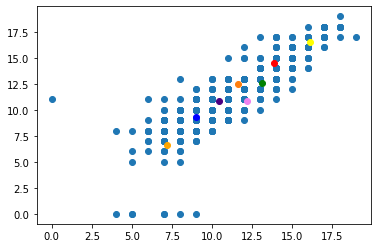

In [25]:
kmeans = KMeans(8)
fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty_one, twenty_two = kmeans.train(famSize,8, 10, 'G1', 'G2')

In [26]:
print("Size of Fifteen list ",len(Fifteen))
print("Size of KMeans Fifteen list ",len(fifteen))
print("Size of Sixteen list ",len(Sixteen))
print("Size of KMeans Sixteen list ",len(sixteen))
print("Size of Seventeen list ",len(Seventeen))
print("Size of KMeans Seventeen list ",len(seventeen))
print("Size of Eighteen list ",len(Eighteen))
print("Size of KMeans Eighteen list ",len(eighteen))
print("Size of Nineteen list ",len(Nineteen))
print("Size of KMeans Nineteen list ",len(nineteen))
print("Size of Twenty list ",len(Twenty))
print("Size of KMeans Twenty list ",len(twenty))
print("Size of Twenty One list ",len(Twenty_one))
print("Size of KMeans Twenty One list ",len(twenty_one))
print("Size of Twenty Two list ",len(Twenty_two))
print("Size of KMeans Twenty Two list ",len(twenty_two))

Size of Fifteen list  112
Size of KMeans Fifteen list  85
Size of Sixteen list  177
Size of KMeans Sixteen list  62
Size of Seventeen list  179
Size of KMeans Seventeen list  65
Size of Eighteen list  140
Size of KMeans Eighteen list  82
Size of Nineteen list  32
Size of KMeans Nineteen list  137
Size of Twenty list  6
Size of KMeans Twenty list  116
Size of Twenty One list  2
Size of KMeans Twenty One list  31
Size of Twenty Two list  1
Size of KMeans Twenty Two list  71


In [27]:
fifteen_list = []
sixteen_list = []
seventeen_list = []
eighteen_list = []
nineteen_list = []
twenty_list = []
twenty_one_list = []
twenty_two_list = []

for i in range(len(fifteen)):
    fifteen_list.append(fifteen[i][:2])
fifteen_list = np.array(fifteen_list)
#copy array for later use in test
cpfifteen_list = np.array(fifteen_list)

for i in range(len(sixteen)):
    sixteen_list.append(sixteen[i][:2])
sixteen_list = np.array(sixteen_list)
#copy array for later use in test
cpsixteen_list = np.array(sixteen_list)

for i in range(len(seventeen)):
    seventeen_list.append(seventeen[i][:2])
seventeen_list = np.array(seventeen_list)
#copy array for later use in test
cpseventeen_list = np.array(seventeen_list)

for i in range(len(eighteen)):
    eighteen_list.append(eighteen[i][:2])
eighteen_list = np.array(eighteen_list)
#copy array for later use in test
cpeighteen_list = np.array(eighteen_list)

for i in range(len(nineteen)):
    nineteen_list.append(nineteen[i][:2])
nineteen_list = np.array(nineteen_list)
#copy array for later use in test
cpnineteen_list = np.array(nineteen_list)

for i in range(len(twenty)):
    twenty_list.append(twenty[i][:2])
twenty_list = np.array(twenty_list)
#copy array for later use in test
cptwenty_list = np.array(twenty_list)

for i in range(len(twenty_one)):
    twenty_one_list.append(twenty_one[i][:2])
twenty_one_list = np.array(twenty_one_list)
#copy array for later use in test
cptwenty_one_list = np.array(twenty_one_list)

for i in range(len(twenty_two)):
    twenty_two_list.append(twenty_two[i][:2])
twenty_two_list = np.array(twenty_two_list)
#copy array for later use in test
cptwenty_two_list = np.array(twenty_two_list)

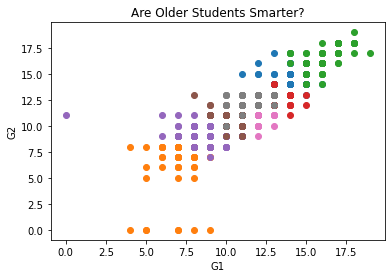

In [28]:
#Kmeans predicted
fifteen_list = pd.DataFrame(fifteen_list)
sixteen_list = pd.DataFrame(sixteen_list)
seventeen_list = pd.DataFrame(seventeen_list)
eighteen_list = pd.DataFrame(eighteen_list)
nineteen_list = pd.DataFrame(nineteen_list)
twenty_list = pd.DataFrame(twenty_list)
twenty_one_list = pd.DataFrame(twenty_one_list)
twenty_two_list = pd.DataFrame(twenty_two_list)
plt.scatter(fifteen_list[0],fifteen_list[1])
plt.scatter(sixteen_list[0],sixteen_list[1])
plt.scatter(seventeen_list[0],seventeen_list[1])
plt.scatter(eighteen_list[0],eighteen_list[1])
plt.scatter(nineteen_list[0],nineteen_list[1])
plt.scatter(twenty_list[0],twenty_list[1])
plt.scatter(twenty_one_list[0],twenty_one_list[1])
plt.scatter(twenty_two_list[0],twenty_two_list[1])

plt.title('Are Older Students Smarter?')
#plt.legend(['Fifteen','Sixteen','Seventeen','Eighteen','Nineteen','Twenty','Twenty One','Twenty Two'])
plt.xlabel('G1')
plt.ylabel('G2')
plt.show()

## 5) Show a Visualization of Each Feature in the Dataset

Below is the list of attributes listed in the Students Dataset:

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2 sex - student's sex (binary: 'F' - female or 'M' - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: 'U' - urban or 'R' - rural)

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)

# Gender Count of Each School

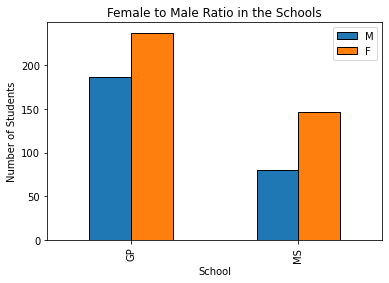

In [29]:
temp = student_data[['school', 'sex']]
Male = temp[temp['sex'] == 'M'].groupby(by='school').count()
Female = temp[temp['sex'] == 'F'].groupby(by='school').count()
Male.rename(columns={'sex': 'M'}, inplace=True)
Female.rename(columns={'sex': 'F'}, inplace=True)
combined = pd.concat((Male, Female), axis=1)
combined.plot.bar(edgecolor = 'black')
plt.title("Female to Male Ratio in the Schools")
plt.xlabel("School")
plt.ylabel("Number of Students")
plt.show()

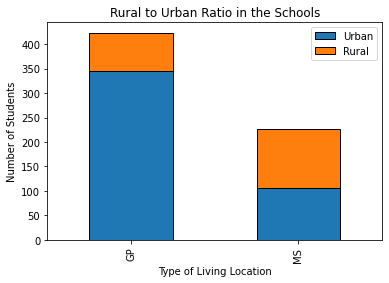

In [30]:
temp = student_data[['school', 'address']]
Urban = temp[temp['address'] == 'U'].groupby(by='school').count()
Rural = temp[temp['address'] == 'R'].groupby(by='school').count()
Urban.rename(columns={'address': 'U'}, inplace=True)
Rural.rename(columns={'address': 'R'}, inplace=True)
combined = pd.concat((Urban, Rural), axis=1)
combined.plot.bar(stacked = True, edgecolor = 'black')
plt.title("Rural to Urban Ratio in the Schools")
plt.xlabel("Type of Living Location")
plt.ylabel("Number of Students")
plt.legend(['Urban','Rural'])
plt.show()

# Family Size Per Age of Students

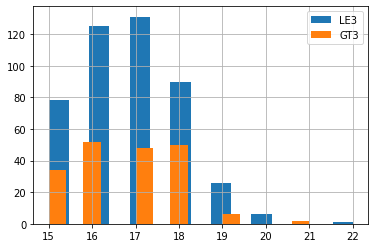

In [31]:
temp = student_data[['age','famsize']]

gt3 = temp[temp['famsize'] == "GT3"]
le3 = temp[temp['famsize'] == "LE3"]
gt3['age'].hist(bins = 15,legend=True)
le3['age'].hist(bins = 15,legend=True)
plt.legend(['LE3','GT3'])

# Parents' Relationship Status Per Age

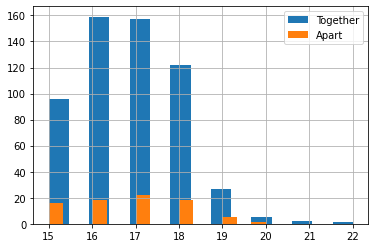

In [32]:
temp = student_data[['age','Pstatus']]

together = temp[temp['Pstatus'] == "T"]
apart = temp[temp['Pstatus'] == "A"]
together['age'].hist(bins = 15,legend=True)
apart['age'].hist(bins = 15,legend=True)
plt.legend(['Together','Apart'])

# Mother's Job Based on Education Status

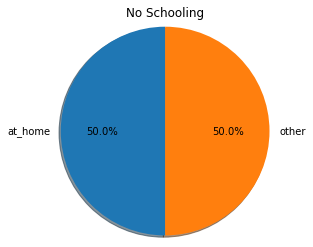

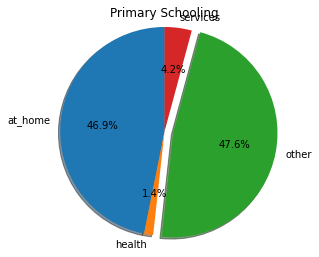

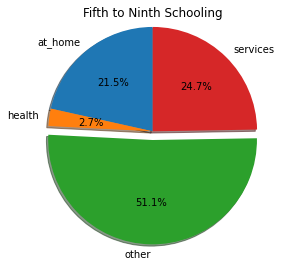

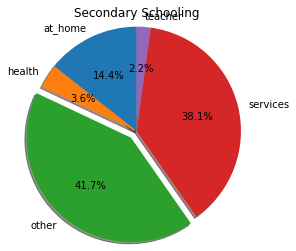

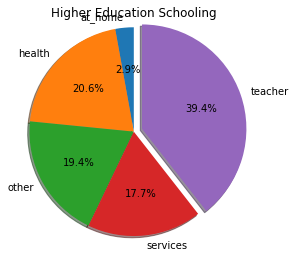

In [33]:
temp = student_data[['Medu', 'Mjob', 'Fedu', 'Fjob']]
none = temp[temp['Medu'] == 0].groupby('Mjob').count()
primary = temp[temp['Medu'] == 1].groupby('Mjob').count()
five_to_nine = temp[temp['Medu'] == 2].groupby('Mjob').count()
secondary = temp[temp['Medu'] == 3].groupby('Mjob').count()
higher = temp[temp['Medu'] == 4].groupby('Mjob').count()

none_jobs = ['at_home','other']
#print(secondary)
slices = [none['Medu'][0], none['Medu'][1]]

# No schooling
plt.pie(slices, labels = none_jobs, startangle=90, shadow = True, explode = (0, 0),
        radius = 1.2, autopct = '%1.1f%%')
plt.title("No Schooling")
plt.show()

#primary schooling
primary_jobs = ['at_home', 'health', 'other', 'services']
slices = [primary['Medu'][0], primary['Medu'][1], primary['Medu'][2], primary['Medu'][3]]
plt.pie(slices, labels = primary_jobs, startangle=90, shadow = True, explode = (0, 0, 0.1, 0),
        radius = 1.2, autopct = '%1.1f%%')
plt.title("Primary Schooling")
plt.show()

#fifth through ninth schooling
five_nines = ['at_home', 'health', 'other', 'services']
slices = [five_to_nine['Medu'][0], five_to_nine['Medu'][1], five_to_nine['Medu'][2], five_to_nine['Medu'][3]]
plt.pie(slices, labels = five_nines, startangle=90, shadow = True, explode = (0, 0, 0.1, 0),
        radius = 1.2, autopct = '%1.1f%%')
plt.title("Fifth to Ninth Schooling")
plt.show()

#Secondary schooling
secondary_jobs = ['at_home', 'health', 'other', 'services', 'teacher']
slices = [secondary['Medu'][0], secondary['Medu'][1], secondary['Medu'][2], secondary['Medu'][3], secondary['Medu'][4]]
plt.pie(slices, labels = secondary_jobs, startangle=90, shadow = True, explode = (0, 0, 0.1, 0, 0),
        radius = 1.2, autopct = '%1.1f%%')
plt.title("Secondary Schooling")
plt.show()

#Higher ed schooling
higher_jobs = ['at_home', 'health', 'other', 'services', 'teacher']
slices = [higher['Medu'][0], higher['Medu'][1], higher['Medu'][2], higher['Medu'][3], higher['Medu'][4]]
plt.pie(slices, labels = secondary_jobs, startangle=90, shadow = True, explode = (0, 0, 0, 0, 0.1),
        radius = 1.2, autopct = '%1.1f%%')
plt.title("Higher Education Schooling")
plt.show()

# Father's Job Based on Education Status

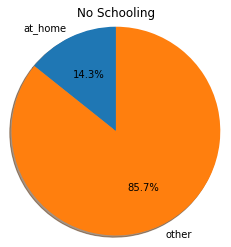

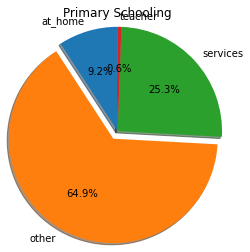

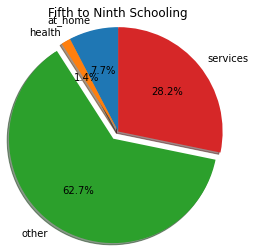

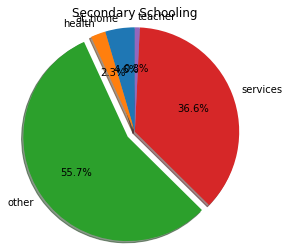

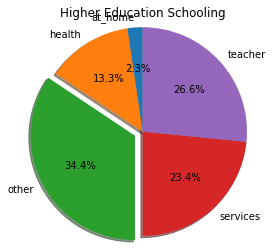

In [34]:
none = temp[temp['Fedu'] == 0].groupby('Fjob').count()
primary = temp[temp['Fedu'] == 1].groupby('Fjob').count()
five_to_nine = temp[temp['Fedu'] == 2].groupby('Fjob').count()
secondary = temp[temp['Fedu'] == 3].groupby('Fjob').count()
higher = temp[temp['Fedu'] == 4].groupby('Fjob').count()

none_jobs = ['at_home','other']
slices = [none['Fedu'][0], none['Fedu'][1]]

# No schooling
plt.pie(slices, labels = none_jobs, startangle=90, shadow = True, explode = (0, 0),
        radius = 1.2, autopct = '%1.1f%%')
plt.title("No Schooling")
plt.show()

#primary schooling
primary_jobs = ['at_home', 'other', 'services','teacher']
slices = [primary['Fedu'][0], primary['Fedu'][1], primary['Fedu'][2], primary['Fedu'][3]]
plt.pie(slices, labels = primary_jobs, startangle=90, shadow = True, explode = (0, 0.1, 0, 0),
        radius = 1.2, autopct = '%1.1f%%')
plt.title("Primary Schooling")
plt.show()

#fifth through ninth schooling
five_nines = ['at_home', 'health', 'other', 'services']
slices = [five_to_nine['Fedu'][0], five_to_nine['Fedu'][1], five_to_nine['Fedu'][2], five_to_nine['Fedu'][3]]
plt.pie(slices, labels = five_nines, startangle=90, shadow = True, explode = (0, 0, 0.1, 0),
        radius = 1.2, autopct = '%1.1f%%')
plt.title("Fifth to Ninth Schooling")
plt.show()

#Secondary schooling
secondary_jobs = ['at_home', 'health', 'other', 'services', 'teacher']
slices = [secondary['Fedu'][0], secondary['Fedu'][1], secondary['Fedu'][2], secondary['Fedu'][3], secondary['Fedu'][4]]
plt.pie(slices, labels = secondary_jobs, startangle=90, shadow = True, explode = (0, 0, 0.1, 0, 0),
        radius = 1.2, autopct = '%1.1f%%')
plt.title("Secondary Schooling")
plt.show()

#Higher ed schooling
higher_jobs = ['at_home', 'health', 'other', 'services', 'teacher']
slices = [higher['Fedu'][0], higher['Fedu'][1], higher['Fedu'][2], higher['Fedu'][3], higher['Fedu'][4]]
plt.pie(slices, labels = secondary_jobs, startangle=90, shadow = True, explode = (0, 0, 0.1, 0, 0),
        radius = 1.2, autopct = '%1.1f%%')
plt.title("Higher Education Schooling")
plt.show()

# Male Jobs

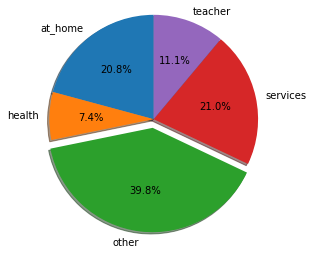

In [35]:
activities = ['at_home', 'health', 'other', 'services', 'teacher']

#Find percent of each job Men have
at_home_percent = ((student_data[student_data['Mjob'] == 'at_home'].count() / student_data.shape[0])[0])
health_percent = ((student_data[student_data['Mjob'] == 'health'].count() / student_data.shape[0])[0])
other_percent = ((student_data[student_data['Mjob'] == 'other'].count() / student_data.shape[0])[0])
services_percent = ((student_data[student_data['Mjob'] == 'services'].count() / student_data.shape[0])[0])
teacher_percent = ((student_data[student_data['Mjob'] == 'teacher'].count() / student_data.shape[0])[0])

# portion covered by each label
slices = [at_home_percent, health_percent, other_percent, services_percent, teacher_percent]

# plotting the pie chart
plt.pie(slices, labels = activities, startangle=90, shadow = True, explode = (0, 0, 0.1, 0, 0),
        radius = 1.2, autopct = '%1.1f%%', normalize = False)
#plt.legend()
plt.show()

# Female Jobs

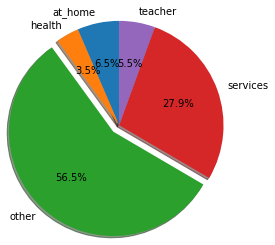

In [36]:
activities = ['at_home', 'health', 'other', 'services', 'teacher']

#Find percent of each job Men have
at_home_percent = ((student_data[student_data['Fjob'] == 'at_home'].count() / student_data.shape[0])[0])
health_percent = ((student_data[student_data['Fjob'] == 'health'].count() / student_data.shape[0])[0])
other_percent = ((student_data[student_data['Fjob'] == 'other'].count() / student_data.shape[0])[0])
services_percent = ((student_data[student_data['Fjob'] == 'services'].count() / student_data.shape[0])[0])
teacher_percent = ((student_data[student_data['Fjob'] == 'teacher'].count() / student_data.shape[0])[0])

# portion covered by each label
slices = [at_home_percent, health_percent, other_percent, services_percent, teacher_percent]

# plotting the pie chart
plt.pie(slices, labels = activities, startangle=90, shadow = True, explode = (0, 0, 0.1, 0, 0),
        radius = 1.2, autopct = '%1.1f%%', normalize = False)
#plt.legend()
plt.show()

# Grades Based on the Student's Age

Text(0, 0.5, 'Average Scores')

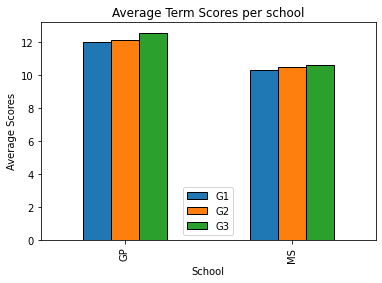

In [37]:
temp = student_data[['school', 'G1', 'G2', 'G3']]
G1 = temp[temp['G1'] > 0].groupby(by='school').mean()
G1.rename(columns={'G1': 'G1'}, inplace=True)
G1.plot.bar(edgecolor = 'black')
plt.title("Average Term Scores per school")
plt.xlabel("School")
plt.ylabel("Average Scores")

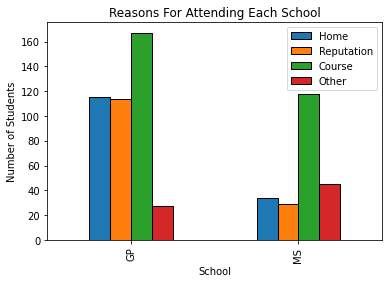

In [38]:
temp = student_data[['school', 'reason']]
home = temp[temp['reason'] == 'home'].groupby(by='school').count()
reputation = temp[temp['reason'] == 'reputation'].groupby(by='school').count()
course = temp[temp['reason'] == 'course'].groupby(by='school').count()
other = temp[temp['reason'] == 'other'].groupby(by='school').count()
home.rename(columns={'reason': 'Home'}, inplace=True)
reputation.rename(columns={'reason': 'Reputation'}, inplace=True)
course.rename(columns={'reason': 'Course'}, inplace=True)
other.rename(columns={'reason': 'Other'}, inplace=True)
combined = pd.concat((home, reputation, course, other), axis=1)
combined.plot.bar(edgecolor = 'black')
plt.title("Reasons For Attending Each School")
plt.xlabel("School")
plt.ylabel("Number of Students")
plt.show()

# Student's Guardian

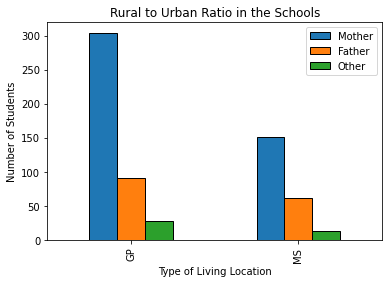

In [39]:
temp = student_data[['school', 'guardian']]
mother = temp[temp['guardian'] == 'mother'].groupby(by='school').count()
father = temp[temp['guardian'] == 'father'].groupby(by='school').count()
other = temp[temp['guardian'] == 'other'].groupby(by='school').count()
mother.rename(columns={'guardian': 'Mother'}, inplace=True)
father.rename(columns={'guardian': 'Father'}, inplace=True)
other.rename(columns={'guardian': 'Other'}, inplace=True)
combined = pd.concat((mother, father, other), axis=1)
combined.plot.bar(edgecolor = 'black')
plt.title("Rural to Urban Ratio in the Schools")
plt.xlabel("Type of Living Location")
plt.ylabel("Number of Students")
plt.legend(['Mother','Father', 'Other'])
plt.show()

# Travel Time Based on Address

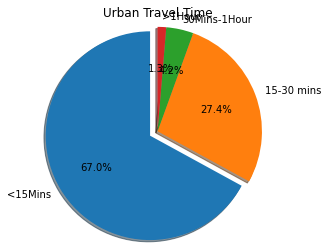

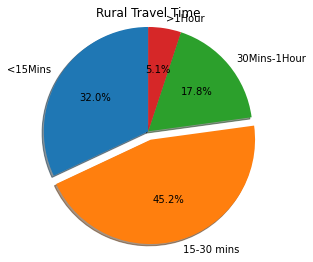

In [40]:
temp = student_data[['traveltime', 'address']]
Urban = temp[temp['address'] == 'U'].groupby(by='traveltime').count().reset_index()
Rural = temp[temp['address'] == 'R'].groupby(by='traveltime').count().reset_index()

#Urban travel
urban_time = ['<15Mins', '15-30 mins', '30Mins-1Hour', '>1Hour']
slices = [Urban['address'][0], Urban['address'][1], Urban['address'][2], Urban['address'][3]]
plt.pie(slices, labels = urban_time, startangle=90, shadow = True, explode = (0.1, 0, 0, 0),
        radius = 1.2, autopct = '%1.1f%%')
plt.title("Urban Travel Time")
plt.show()

#Rural travel
rural_time = ['<15Mins', '15-30 mins', '30Mins-1Hour', '>1Hour']
slices = [Rural['address'][0], Rural['address'][1], Rural['address'][2], Rural['address'][3]]
plt.pie(slices, labels = rural_time, startangle=90, shadow = True, explode = (0, 0.1, 0, 0),
        radius = 1.2, autopct = '%1.1f%%')
plt.title("Rural Travel Time")
plt.show()

# Final Grade Based on Study Time

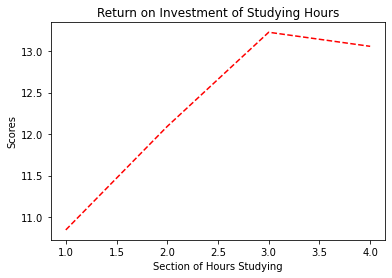

In [41]:
temp = student_data[['studytime','G3']]
lt_two = temp[temp['studytime'] == 1].mean()
two_five = temp[temp['studytime'] == 2].mean()
five_ten = temp[temp['studytime'] == 3].mean()
gt_ten = temp[temp['studytime'] == 4].mean()

index = [1,2,3,4]
means = [lt_two['G3'],two_five['G3'],five_ten['G3'],gt_ten['G3']]
plt.plot(index, means, linestyle = 'dashed', c = 'r')
plt.title("Return on Investment of Studying Hours")
plt.xlabel("Section of Hours Studying")
plt.ylabel("Scores")
plt.show()

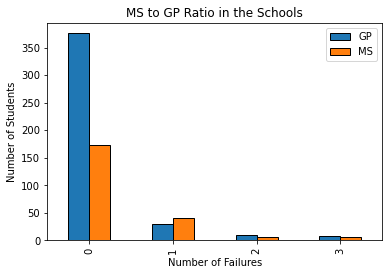

In [42]:
temp = student_data[['school', 'failures']]
tmp = temp['failures'].unique()
GP = temp[temp['school'] == 'GP'].groupby(by='failures').count()
MS = temp[temp['school'] == 'MS'].groupby(by='failures').count()
GP.rename(columns={'school': 'GP'}, inplace=True)
MS.rename(columns={'school': 'MS'}, inplace=True)
combined = pd.concat((GP, MS), axis=1)
combined.plot.bar(edgecolor = 'black')
plt.title("MS to GP Ratio in the Schools")
plt.xlabel("Number of Failures")
plt.ylabel("Number of Students")
plt.legend(['GP','MS'])
plt.show()

# Who is receiving Extra School Support? 

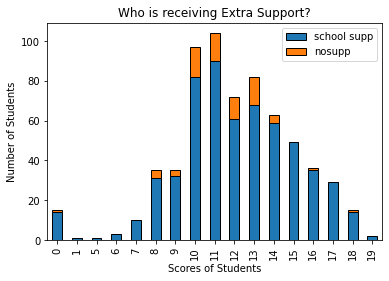

In [43]:
temp = student_data[['schoolsup', 'G3']]
supp = temp[temp['schoolsup'] == 'yes'].groupby('G3').count()
nosupp = temp[temp['schoolsup'] == 'no'].groupby('G3').count()
supp.rename(columns={'schoolsup': 'yes'}, inplace=True)
nosupp.rename(columns={'schoolsup': 'no'}, inplace=True)
combined = pd.concat((nosupp, supp), axis=1)
combined.plot.bar(stacked = True, edgecolor = 'black')
plt.title("Who is receiving Extra Support?")
plt.xlabel("Scores of Students")
plt.ylabel("Number of Students")
plt.legend(['school supp','nosupp'])
plt.show()

# Who is receiving Extra Family Support

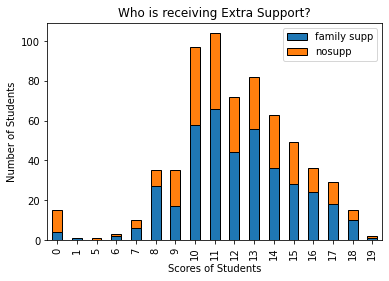

In [44]:
temp = student_data[['famsup', 'G3']]
supp = temp[temp['famsup'] == 'yes'].groupby('G3').count()
nosupp = temp[temp['famsup'] == 'no'].groupby('G3').count()
supp.rename(columns={'famsup': 'yes'}, inplace=True)
nosupp.rename(columns={'famsup': 'no'}, inplace=True)
combined = pd.concat((supp, nosupp), axis=1)
combined.plot.bar(stacked = True, edgecolor = 'black')
plt.title("Who is receiving Extra Support?")
plt.xlabel("Scores of Students")
plt.ylabel("Number of Students")
plt.legend(['family supp','nosupp'])
plt.show()

# Boolean Values in Dataset

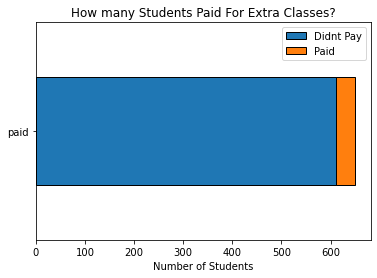

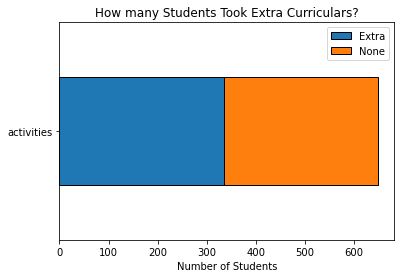

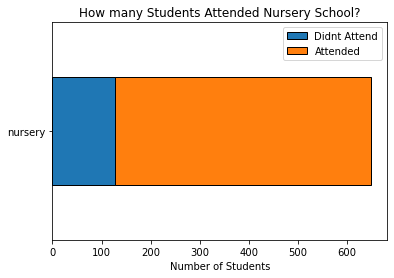

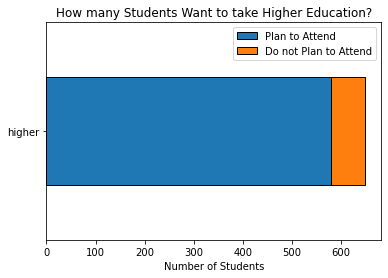

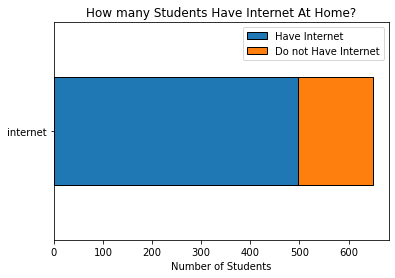

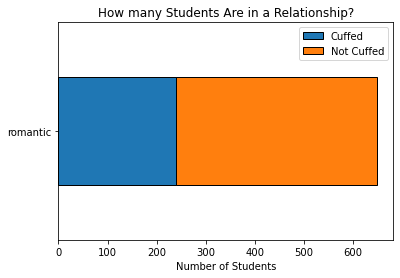

In [45]:
#18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
temp = student_data[['paid']]
paid = temp[temp['paid'] == 'yes'].count()
nopaid = temp[temp['paid'] == 'no'].count()
combined = pd.concat((nopaid, paid), axis=1)
combined.plot(kind = 'barh', stacked = True, edgecolor = 'black')
plt.title("How many Students Paid For Extra Classes?")
plt.legend(['Didnt Pay','Paid'])
plt.xlabel("Number of Students")

#19 activities - extra-curricular activities (binary: yes or no)
temp = student_data[['activities']]
extra = temp[temp['activities'] == 'yes'].count()
noextra = temp[temp['activities'] == 'no'].count()
combined = pd.concat((noextra, extra), axis=1)
combined.plot(kind = 'barh', stacked = True, edgecolor = 'black')
plt.title("How many Students Took Extra Curriculars?")
plt.legend(['Extra','None'])
plt.xlabel("Number of Students")

#20 nursery - attended nursery school (binary: yes or no)
temp = student_data[['nursery']]
attended = temp[temp['nursery'] == 'yes'].count()
noattended = temp[temp['nursery'] == 'no'].count()
combined = pd.concat((noattended, attended), axis=1)
combined.plot(kind = 'barh', stacked = True, edgecolor = 'black')
plt.title("How many Students Attended Nursery School?")
plt.legend(['Didnt Attend','Attended'])
plt.xlabel("Number of Students")

#21 higher - wants to take higher education (binary: yes or no)
temp = student_data[['higher']]
yes = temp[temp['higher'] == 'yes'].count()
no = temp[temp['higher'] == 'no'].count()
combined = pd.concat((yes, no), axis=1)
combined.plot(kind = 'barh', stacked = True, edgecolor = 'black')
plt.title("How many Students Want to take Higher Education?")
plt.legend(['Plan to Attend','Do not Plan to Attend'])
plt.xlabel("Number of Students")

#22 internet - Internet access at home (binary: yes or no)
temp = student_data[['internet']]
yes = temp[temp['internet'] == 'yes'].count()
no = temp[temp['internet'] == 'no'].count()
combined = pd.concat((yes, no), axis=1)
combined.plot(kind = 'barh', stacked = True, edgecolor = 'black')
plt.title("How many Students Have Internet At Home?")
plt.legend(['Have Internet','Do not Have Internet'])
plt.xlabel("Number of Students")

#23 romantic - with a romantic relationship (binary: yes or no
temp = student_data[['romantic']]
yes = temp[temp['romantic'] == 'yes'].count()
no = temp[temp['romantic'] == 'no'].count()
combined = pd.concat((yes, no), axis=1)
combined.plot(kind = 'barh', stacked = True, edgecolor = 'black')
plt.title("How many Students Are in a Relationship?")
plt.legend(['Cuffed','Not Cuffed'])
plt.xlabel("Number of Students")
plt.show()

# Quality of Family Relationships Based on Parent Status

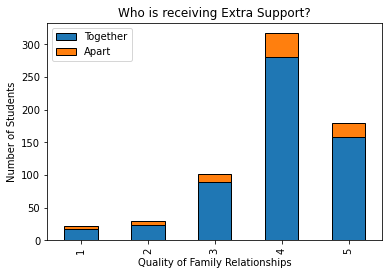

In [46]:
#24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
temp = student_data[['famrel', 'Pstatus']]
together = temp[temp['Pstatus'] == 'T'].groupby('famrel').count()
apart = temp[temp['Pstatus'] == 'A'].groupby('famrel').count()

together.rename(columns={'Pstatus': 'Together'}, inplace=True)
apart.rename(columns={'Pstatus': 'Apart'}, inplace=True)
combined = pd.concat((together, apart), axis=1)
combined.plot.bar(stacked = True, edgecolor = 'black')
plt.title("Who is receiving Extra Support?")
plt.xlabel("Quality of Family Relationships")
plt.ylabel("Number of Students")
plt.legend(['Together','Apart'])
plt.show()

# Free-Time Range Per School

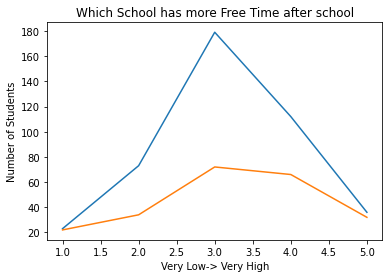

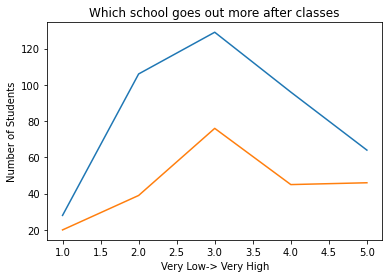

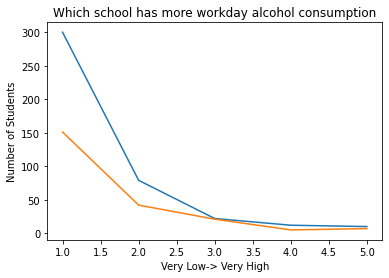

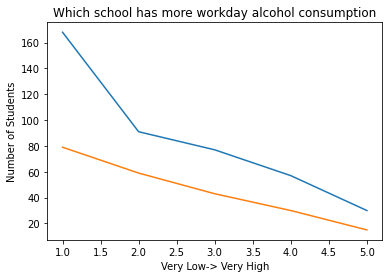

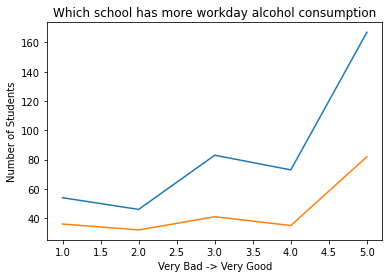

In [47]:
#25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
temp = student_data[['freetime', 'school']]
GP = temp[temp['school'] == 'GP'].groupby('freetime').count()
MS = temp[temp['school'] == 'MS'].groupby('freetime').count()

index = [1,2,3,4,5]
plt.plot(index, GP)
plt.plot(index, MS)
plt.title("Which School has more Free Time after school")
plt.xlabel("Very Low-> Very High")
plt.ylabel("Number of Students")
plt.show()

#26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
temp = student_data[['goout','school']]
GP = temp[temp['school'] == 'GP'].groupby('goout').count()
MS = temp[temp['school'] == 'MS'].groupby('goout').count()
plt.plot(index, GP)
plt.plot(index, MS)
plt.title("Which school goes out more after classes")
plt.xlabel("Very Low-> Very High")
plt.ylabel("Number of Students")
plt.show()

#27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
temp = student_data[['Dalc','school']]
GP = temp[temp['school'] == 'GP'].groupby('Dalc').count()
MS = temp[temp['school'] == 'MS'].groupby('Dalc').count()
plt.plot(index, GP)
plt.plot(index, MS)
plt.title("Which school has more workday alcohol consumption")
plt.xlabel("Very Low-> Very High")
plt.ylabel("Number of Students")
plt.show()

#28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
temp = student_data[['Walc','school']]
GP = temp[temp['school'] == 'GP'].groupby('Walc').count()
MS = temp[temp['school'] == 'MS'].groupby('Walc').count()
plt.plot(index, GP)
plt.plot(index, MS)
plt.title("Which school has more workday alcohol consumption")
plt.xlabel("Very Low-> Very High")
plt.ylabel("Number of Students")
plt.show()

#29 health - current health status (numeric: from 1 - very bad to 5 - very good)
temp = student_data[['health','school']]
GP = temp[temp['school'] == 'GP'].groupby('health').count()
MS = temp[temp['school'] == 'MS'].groupby('health').count()
plt.plot(index, GP)
plt.plot(index, MS)
plt.title("Which school has more workday alcohol consumption")
plt.xlabel("Very Bad -> Very Good")
plt.ylabel("Number of Students")
plt.show()

# Which School Has a Higher Attendance Rate?

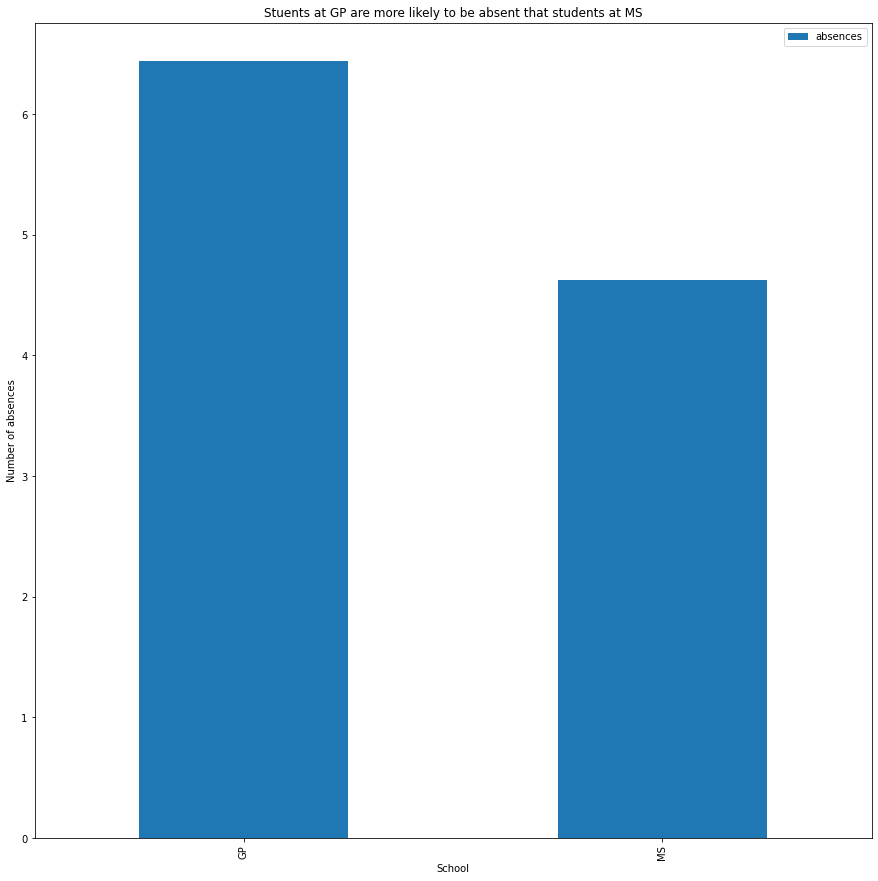

In [48]:
#Which school has a higher attendance rate?
temp = student_data[['school', 'absences']]
le3 = temp[temp['absences'] > 0].groupby('school').mean()
le3.plot.bar(figsize = (15,15))
plt.title("Stuents at GP are more likely to be absent that students at MS")
plt.xlabel("School")
plt.ylabel("Number of absences")
plt.show()